# 1. Business Understanding <a class="anchor" id="chapter1"></a>

## 1.1 Projektbeschreibung <a class="anchor" id="section_1_1"></a>

Das Forschungsteam *ProInsurance* wird damit beauftragt, dass Projekt Cross-Selling-Prediction für den Kunden *NextGen Insurance* durchzuführen. 
Der Kunde benötigt Hilfe bei der Erstellung eines Modells, mit dem sich vorhersagen lässt, ob die Versicherungsnehmer des letzten Jahres auch an einer angebotenen Kfz-Versicherung interessiert sein werden.
Der Kunde wünscht die Durchführung des Projektes innerhalb eines knapp kalkulierten Zeitraums.

Zu diesem Zweck erhält das Forschungsteam von ihrem Auftraggeber einen Datenbestand bestehend aus > 350.000 Datensätzen. Zusätzlich ein Data Dictionary, welches eine kurze Beschreibung der Daten liefert.

Die *NextGen Insurance* hat mehrere Forschungsteams beauftragt an einer Lösung zu arbeiten, damit Sie sich nach Ende der Präsentationen für die beste Alternative entscheiden können.

## 1.2 Data Dictionary des "train"- Datensatz <a class="anchor" id="section_1_2"></a>

Unser Auftraggeber die *NextGen Insurance* stellt uns folgendes Data Dictionary und damit verbunden folgende Beschreibungen der einzelnen Variablen zur Verfügung:

| **Variable**          | **Definition**  | 
|          :-           |         :-        |
| id                    |Unique ID for the customer| 
| gender                |Gender of the customer| 
| age                   |Age of the customer| 
| driving_license       |0 : Customer doesn't have DL, 1 : Customer has DL| 
| region_code           |Unique code for the region of the customer| 
| previously_insured    |0 : Customer doesn't have Vehicle Insurance, 1 : Customer has Vehicle Insurance| 
| vehicle_age           |Age of the Vehicle| 
| vehicle_damage        |1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.| 
| annual_premium        |The amount customer needs to pay as premium in the year for Health insurance| 
| policy_sales_channel  |Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.| 
| vintage               |Number of Days customer has been associated with the company| 
| response              |1 : Customer is interested, 0 : Customer is not interested| 



# 2. Data Understanding <a class="anchor" id="chapter2"></a>

## 2.1 Pakete importieren <a class="anchor" id="section_2_1"></a>

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Sklearn Packages
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.metrics import RocCurveDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PrecisionRecallDisplay

# Undersamling / Oversampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [2]:
import warnings
warnings.filterwarnings("ignore")

## 2.2 Daten einlesen <a class="anchor" id="section_2_2"></a>

Der Datensatz wurde von der *NextGen Insurance* bereitgestellt.<br>
<br>
Der Datensatz "train_datenset" wird zur Analyse eingelesen:
- Entfernung des Trennzeichen "$".
- Umwandlung von Zelleninhalten in Wahrheitswerte (Yes, yes, 1; No, no, 0).
- Einrücken des Datensatzes.

Der Datensatz "real_datenset" wird zur Analyse eingelesen:
- Entfernung der Trennzeichen "$" und ",".
- Umwandlung von Zelleninhalten in Wahrheitswerte (Yes, yes, 1; No, no, 0).
- Einrücken des Datensatzes.

In [3]:
# Read train.csv
train_dataset = pd.read_csv(
    "train.csv",
    sep="$",
    true_values=["Yes", "yes", "1"],
    false_values=["No", "no", "0"],
    index_col=False,
    low_memory=False,
)

#Read test.csv
real_dataset = pd.read_csv(
    "test.csv",
    sep="\$|,",  # this csv uses 2 different separators
    true_values=["Yes", "yes", "1"],
    false_values=["No", "no", "0"],
    index_col=False,
    engine="python"  # c engine does not support regex or multiple separators
)

## 2.3 Datensatz Anzeigen <a class="anchor" id="section_2_3"></a>

Zur Betrachtung der Variablen aus dem Datensatz werden die ersten zwanzig Einträge angezeigt:

In [4]:
train_dataset.head(20)

,Unnamed: 0,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,Male,44,False,28.0,False,> 2 Years,True,40454.0,26.0,217,True
1,1,2,Male,76,False,3.0,False,1-2 Year,False,33536.0,26.0,183,False
2,2,3,Male,47,False,28.0,False,> 2 Years,True,38294.0,26.0,27,True
3,3,4,Male,21,True,11.0,True,< 1 Year,False,28619.0,152.0,203,False
4,4,5,Female,29,True,41.0,True,< 1 Year,False,27496.0,152.0,39,False
5,5,6,Female,24,False,33.0,False,< 1 Year,True,2630.0,160.0,176,False
6,6,7,Male,23,False,11.0,False,< 1 Year,True,23367.0,152.0,249,False
7,7,8,Female,56,False,28.0,False,1-2 Year,True,32031.0,26.0,72,True
8,8,9,Female,24,True,3.0,True,< 1 Year,False,27619.0,152.0,28,False
9,9,10,Female,32,True,6.0,True,< 1 Year,False,28771.0,152.0,80,False


## 2.4 Spaltennamen und Datentypen <a class="anchor" id="section_2_4"></a>

Um eventuelle Korrekturen vorzunehmen betrachten wir die Datentypen der im Datensatz enthaltenen Variablen.

In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380999 entries, 0 to 380998
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            380999 non-null  int64  
 1   id                    380999 non-null  int64  
 2   Gender                379948 non-null  object 
 3   Age                   370107 non-null  object 
 4   Driving_License       380948 non-null  object 
 5   Region_Code           380999 non-null  object 
 6   Previously_Insured    380948 non-null  object 
 7   Vehicle_Age           380948 non-null  object 
 8   Vehicle_Damage        380948 non-null  object 
 9   Annual_Premium        380999 non-null  float64
 10  Policy_Sales_Channel  380999 non-null  object 
 11  Vintage               380948 non-null  object 
 12  Response              380999 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 35.2+ MB


- Die Spalten `Driving_License`, `Previously_Insured`, und `Vehicle_Damage` wurden nicht in den booleschen Datentypen gecastet. Dies ist ein Indikator dafür das diese Spalten invalide oder fehlende Werte enthalten.
- Die Spalte `Age` wurde nicht in einen Integer oder Float gecastet, auch hier ist dies ein Indikator dafür, dass diese Spalte invalide oder fehlende Werte enthält. 

## 2.5 Datentypen anpassen <a class="anchor" id="section_2_5"></a>

- Die zum Pandas Modul zugehörige Funktion "**.unique()**" ermöglicht die Ausgabe aller einzigartigen Werte. Dies erleichtert das Nachvollziehen von Eingabefehlern um diese zu korrigieren.
- Der Numpy-Datentyp `int64` unterstützt keine nullable Values (NaN), deshalb wird der Pandas-Datentyp `Int64` verwendet.

### 2.5.1 Variable Age <a class="anchor" id="section_2_5_1"></a>

In [6]:
train_dataset["Age"].unique()

array(['44', '76', '47', '21', '29', '24', '23', '56', '32', '41', '71',
       '37', '25', '42', '60', '65', '49', '34', '51', '26', '57', '79',
       '48', '45', '72', '30', '54', '27', '38', '22', '78', '20', '39',
       '62', '58', '59', '63', '50', '67', '77', '28', '69', '52', '31',
       '33', '43', '36', '53', '70', '46', '55', '40', '61', '75', '64',
       '35', '66', '68', '74', '73', '84', '83', '81', '80', '133', '171',
       '163', '144', '187', '203', '143', '123', '183', '167', '129',
       '127', '142', '82', '175', '128', '150', '196', '154', '198',
       '116', '152', '161', '114', '166', '124', '134', '173', '106',
       '199', '162', '157', '132', '156', '119', '159', '85', '192',
       '201', '177', '121', '160', '136', '148', '158', '113', '184',
       '182', '122', '190', '174', '176', '195', '147', '189', nan, '181',
       '188', '107', '145', '149', '137', '139', '126', '130', '202',
       '138', '193', '109', '179', '155', '125', '172', '200', '135

Aus dieser Ausgabe kann man sehen, dass einige fehlerhaften Eingaben getätigt wurden (z.B. "29.."). Da die Werte dieser Datensätze aber inhaltlich richtig sein könnten, sollen sie behalten werden.

In [7]:
# convert to string
train_dataset["Age"] = train_dataset["Age"].astype(pd.StringDtype())

# remove .. as this is what prevents us from propper type conversion
train_dataset["Age"] = train_dataset["Age"].str.replace(".", "")

# convert to int (no decimals observed in train data)
train_dataset["Age"] = train_dataset["Age"].astype("Int64")

Durch das Casten in den String-Datentyp können die fehlerhaften Sonderzeichen (..) entfernt werden. Anschließend wird die Variable in den gewünschten Integer-Datentypen gecastet.

### 2.5.2 Variablen Driving_License, Previously_Insured und Vehicle_Damage <a class="anchor" id="section_2_5_2"></a>

In [8]:
print("Driving_License:", train_dataset["Driving_License"].unique())

print("Previously_Insured:", train_dataset["Previously_Insured"].unique())

print("Vehicle_Damage:", train_dataset["Vehicle_Damage"].unique())


Driving_License: [False True nan]
Previously_Insured: [False True nan]
Vehicle_Damage: [True False nan]


Die Ausgabe weist darauf hin, dass diese Variablen richtig einglesen werden konnten und es keine (inhaltlich) falschen Ausprägungen gibt. 
- Es gibt nur `True`, `False` und Missing Values(NaN).


In [9]:
# convert each column
# no cleanup required
train_dataset["Driving_License"] = train_dataset["Driving_License"].astype(pd.BooleanDtype())

train_dataset["Previously_Insured"] = train_dataset["Previously_Insured"].astype(pd.BooleanDtype())
    
train_dataset["Vehicle_Damage"] = train_dataset["Vehicle_Damage"].astype(pd.BooleanDtype())

Anschließend wird die Variable in den gewünschten Boolean-Datentyp gecastet.

### 2.5.3 Variable Gender <a class="anchor" id="section_2_5_3"></a>

In [10]:
train_dataset["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

Die Ausgabe weist darauf hin, dass diese Variablen richtig einglesen werden konnten und es keine (inhaltlich) falschen Ausprägungen gibt. 
- Es gibt nur die zwei Kategorien `Male`, `Female` und Missing Values(NaN).


In [11]:
# no cleanup required
train_dataset["Gender"] = train_dataset["Gender"].astype(pd.CategoricalDtype())

Anschließend wird die Variable in den gewünschten Category-Datentyp gecastet.

### 2.5.4 Variable Region Code <a class="anchor" id="section_2_5_4"></a>

In [12]:
train_dataset["Region_Code"].unique()

array(['28.0', '3.0', '11.0', '41.0', '33.0', '6.0', '35.0', '50.0',
       '15.0', '45.0', '8.0', '36.0', '30.0', '26.0', '16.0', '47.0',
       '48.0', '19.0', '39.0', '23.0', '37.0', '5.0', '17.0', '2.0',
       '7.0', '29.0', '46.0', '27.0', '25.0', '13.0', '18.0', '20.0',
       '49.0', '22.0', '44.0', '0.0', '9.0', '31.0', '12.0', '34.0',
       '21.0', '10.0', '14.0', '38.0', '24.0', '40.0', '43.0', '32.0',
       '4.0', '51.0', '42.0', '1.0', '52.0', '41.0##'], dtype=object)

Aus dieser Ausgabe kann man sehen, dass eine fehlerhafte Eingabe getätigt wurde ("41.0##"). Da dieser Wert des Datensatz aber inhaltlich richtig sein könnte, soll dieser behalten werden.

In [13]:
# convert to string
train_dataset["Region_Code"] = train_dataset["Region_Code"].astype(pd.StringDtype())

# remove ## as this is what prevents us from propper type conversion
train_dataset["Region_Code"] = train_dataset["Region_Code"].str.replace("#", "")

# convert to category as the region codes are similar to postal codes and have no order
train_dataset["Region_Code"] = train_dataset["Region_Code"].astype(pd.CategoricalDtype())

Durch das Casten in den String-Datentyp kann das fehlerhafte Sonderzeichen (##) entfernt werden. Anschließend wird die Variable in den gewünschten Category-Datentypen gecastet.

### 2.5.5 Variable Vehicle_Age <a class="anchor" id="section_2_5_5"></a>

In [14]:
train_dataset["Vehicle_Age"].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year', nan], dtype=object)

Die Ausgabe weist darauf hin, dass diese Variablen richtig einglesen werden konnten und es keine (inhaltlich) falschen Ausprägungen gibt. 
- Es gibt nur die drei Kategorien `> 2 Years`, `1-2 Year`, `< 1 Year` und Missing Values(NaN).


In [15]:
# no cleanup required
train_dataset["Vehicle_Age"] = train_dataset["Vehicle_Age"].astype(pd.CategoricalDtype())

Anschließend wird die Variable in den gewünschten Category-Datentyp gecastet.

### 2.5.6 Variable Policy_Sales_Channel <a class="anchor" id="section_2_5_6"></a>

In [16]:
train_dataset["Policy_Sales_Channel"].unique()

array(['26.0', '152.0', '160.0', '124.0', '14.0', '13.0', '30.0', '156.0',
       '163.0', '157.0', '122.0', '19.0', '22.0', '15.0', '154.0', '16.0',
       '52.0', '155.0', '11.0', '151.0', '125.0', '25.0', '61.0', '1.0',
       '86.0', '31.0', '150.0', '23.0', '60.0', '21.0', '121.0', '3.0',
       '139.0', '12.0', '29.0', '55.0', '7.0', '47.0', '127.0', '153.0',
       '78.0', '158.0', '89.0', '32.0', '8.0', '10.0', '120.0', '65.0',
       '4.0', '42.0', '83.0', '136.0', '24.0', '18.0', '56.0', '48.0',
       '106.0', '54.0', '93.0', '116.0', '91.0', '45.0', '9.0', '145.0',
       '147.0', '44.0', '109.0', '37.0', '140.0', '107.0', '128.0',
       '131.0', '114.0', '118.0', '159.0', '119.0', '105.0', '135.0',
       '62.0', '138.0', '129.0', '88.0', '92.0', '111.0', '113.0', '73.0',
       '36.0', '28.0', '35.0', '59.0', '53.0', '148.0', '133.0', '108.0',
       '64.0', '39.0', '94.0', '132.0', '46.0', '81.0', '103.0', '90.0',
       '51.0', '27.0', '146.0', '63.0', '96.0', '40.0', 

Aus dieser Ausgabe kann man sehen, dass eine fehlerhafte Eingabe getätigt wurde ("26.0##"). Da dieser Wert des Datensatz aber inhaltlich richtig sein könnte, soll dieser behalten werden.

In [17]:
# convert to string
train_dataset["Policy_Sales_Channel"] = train_dataset["Policy_Sales_Channel"].astype(pd.StringDtype())

# remove ## as this is what prevents us from propper type conversion
train_dataset["Policy_Sales_Channel"] = train_dataset["Policy_Sales_Channel"].str.replace("#", "")

# convert to category as the Policy Sales Channels is a anonymized Code for the channel of outreaching to the customer
train_dataset["Policy_Sales_Channel"] = train_dataset["Policy_Sales_Channel"].astype(pd.CategoricalDtype())

Durch das Casten in den String-Datentyp kann das fehlerhafte Sonderzeichen (##) entfernt werden. Anschließend wird die Variable in den gewünschten Category-Datentypen gecastet.

### 2.5.7 Variable Vintage <a class="anchor" id="section_2_5_7"></a>

In [18]:
train_dataset["Vintage"].unique()

array(['217', '183', '27', '203', '39', '176', '249', '72', '28', '80',
       '46', '289', '221', '15', '58', '147', '256', '299', '158', '102',
       '116', '177', '232', '60', '180', '49', '57', '223', '136', '222',
       '149', '169', '88', '253', '107', '264', '233', '45', '184', '251',
       '153', '186', '71', '34', '83', '12', '246', '141', '216', '130',
       '282', '73', '171', '283', '295', '165', '30', '218', '22', '36',
       '79', '81', '100', '63', '242', '277', '61', '111', '167', '74',
       '235', '131', '243', '248', '114', '281', '62', '189', '139',
       '138', '209', '254', '291', '68', '92', '52', '78', '156', '247',
       '275', '77', '181', '229', '166', '16', '23', '31', '293', '219',
       '50', '155', '66', '260', '19', '258', '117', '193', '204', '212',
       '144', '234', '206', '228', '125', '29', '18', '84', '230', '54',
       '123', '101', '86', '13', '237', '85', '98', '67', '128', '95',
       '89', '99', '208', '134', '135', '268', '284', 

Aus dieser Ausgabe kann man sehen, dass eine fehlerhafte Eingabe getätigt wurde ("81##"). Da dieser Wert des Datensatz aber inhaltlich richtig sein könnte, soll dieser behalten werden.

In [19]:
# convert to string
train_dataset["Vintage"] = train_dataset["Vintage"].astype(pd.StringDtype())

# remove ## as this is what prevents us from propper type conversion
train_dataset["Vintage"] = train_dataset["Vintage"].str.replace("#", "")

# convert to int (no decimals observed in train data)
train_dataset["Vintage"] = train_dataset["Vintage"].astype("Int64")


Durch das Casten in den String-Datentyp können die fehlerhaften Sonderzeichen (##) entfernt werden. Anschließend wird die Variable in den gewünschten Integer-Datentypen gecastet.

### 2.5.8 Variable Unnamed: 0 <a class="anchor" id="section_2_5_8"></a>

In [20]:
train_dataset.drop("Unnamed: 0", axis="columns", inplace=True)

Diese Spalte beinhaltet keine Informationen und wird aus dem "train_dataset" Datensatz entfernt.

### 2.5.9 Angepasste Datentypen anzeigen <a class="anchor" id="section_2_5_9"></a>

In [21]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380999 entries, 0 to 380998
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    380999 non-null  int64   
 1   Gender                379948 non-null  category
 2   Age                   370107 non-null  Int64   
 3   Driving_License       380948 non-null  boolean 
 4   Region_Code           380999 non-null  category
 5   Previously_Insured    380948 non-null  boolean 
 6   Vehicle_Age           380948 non-null  category
 7   Vehicle_Damage        380948 non-null  boolean 
 8   Annual_Premium        380999 non-null  float64 
 9   Policy_Sales_Channel  380999 non-null  category
 10  Vintage               380948 non-null  Int64   
 11  Response              380999 non-null  bool    
dtypes: Int64(2), bool(1), boolean(3), category(4), float64(1), int64(1)
memory usage: 16.7 MB


## 2.6 Deskriptive Analyse <a class="anchor" id="section_2_6"></a>

### 2.6.1 Kennzahlen zur Beschreibung des Datensatz <a class="anchor" id="section_2_6_1"></a>

Folgende statistische Kennzahlen werden verwenden:

In [22]:
train_dataset.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,380999.0,NaN,NaN,NaN,190500.0,109985.081943,1.0,95250.5,190500.0,285749.5,380999.0
Gender,379948,2,Male,205447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,370107.0,NaN,NaN,NaN,38.852091,15.63218,20.0,25.0,36.0,49.0,205.0
Driving_License,380948,2,False,206635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_Code,380999,53,28.0,106372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Previously_Insured,380948,2,False,206635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Age,380948,3,1-2 Year,200228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,380948,2,True,192328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,380999.0,NaN,NaN,NaN,30527.70069,17242.997675,-9997.0,24371.0,31656.0,39390.0,540165.0
Policy_Sales_Channel,380999,155,152.0,134747,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Auffälligkeiten einzelner Variablen anhand der statistischen Kennzahlen werden im nachfolgenden näher erläutert:

| **Variable**          | **Beschreibung**  | 
|          :-           |         :-        |
| id                    |- Beginnt bei 1 und endet bei 380.999 <br> - weißt keine Auffälligkeiten auf| 
| Gender                |- Das Geschlecht "Male" kommt am häufigsten vor mit 205.447 Datensätzen <br> - 2 verschiedene Ausprägungen <br> - 1051 Datensätze fehlen (Vergleich von 379.948 zu 380.999 Datensätzen) | 
| Age                   |- min. = 20 Jahre alt nicht auffällig <br> - Im Durchschnitt 39 Jahre alt <br> - max. = 205 Jahre alt <br> - 10.892 Datensätze fehlen (Vergleich von 370.107 zu 380.999 Datensätzen) | 
| Driving_License       |- Mehr Personen haben keinen Führerschein mit 206.635 Datensätzen als das Sie einen Führerschein haben <br> - 2 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Region_Code           |- Die PLZ 28.0 kommt am häufigsten vor mit 106.372 Datensätzen <br> - 53 verschiedene Ausprägungen | 
| Previously_Insured    |- Mehr Personen haben keine Versicherung mit 206.635 Datensätzen als das Sie eine Versicherung haben <br> - 2 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Vehicle_Age           |- Das Alter des Fahrzeugs beläuft sich auf bei den meisten Personen auf 1-2 Jahre mit 380.948 Datensätzen <br> - 3 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Vehicle_Damage        |- Bei mehr Personen, 192.328 Datensätze, ist es zu einem Schadensfall gekommen <br> - 2 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Annual_Premium        |- min. = -9997.0€ auffällig, da der Betrag den die Kunden zahlen müssen nicht negativ sein kann. <br> - Im Durchschnitt 30.527.71€ <br> - max. = 540.165€ auffällig, da der Betrag deutlich zu hoch ist | 
| Policy_Sales_Channel  |- 155 verschiedene Ausprägungen | 
| Vintage               |- min. = 10 Tage <br> - Im Durchschnitt 154 Tage <br> - max. = 299 Tage <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Response              |- Mehr Personen sind nicht interessiert mit 334.297	Datensätzen <br> - 2 verschiedene Ausprägungen | 


### 2.6.2 Prüfung auf Missing Values <a class="anchor" id="section_2_6_2"></a>

Die zum Pandas Modul zugehörige Funktion "**.isna()**" ermöglicht die Ausgabe aller Missing Values(NaN) und die Funktion "**.sum()**" summiert die Missing Values der einzelnen Spalten auf.

In [23]:
train_dataset.isna().sum()

id                          0
Gender                   1051
Age                     10892
Driving_License            51
Region_Code                 0
Previously_Insured         51
Vehicle_Age                51
Vehicle_Damage             51
Annual_Premium              0
Policy_Sales_Channel        0
Vintage                    51
Response                    0
dtype: int64

Die Überprüfung auf Missing Values zeigt, dass vor allem für die Variable `Age` Werte imputiert werden sollten. In der Spalte `Gender` fehlen rund 1000 Werte. Weiter sieht man, dass in den Spalten `Driving_License`, `Previously_Insured`, `Vehicle_Age`, `Vehicle_Damage` und `Vintage` genau 51 Werte fehlen. Das deutet darauf hin, dass diese Missing Values zu den selben Datensätzen gehören, was nachfolgend überprüft wird.

In [24]:
NaN_in_selected_columns = train_dataset.loc[
                  train_dataset["Vintage"].isna()
                & train_dataset["Vehicle_Damage"].isna()
                & train_dataset["Vehicle_Age"].isna()
                & train_dataset["Previously_Insured"].isna()
                & train_dataset["Driving_License"].isna()
]

print(f"Datensätze mit Vintage, Vehicle_Damage, Vehicle_Age, Previously_Insured und Driving_License fehlen: {len(NaN_in_selected_columns)}")

Datensätze mit Vintage, Vehicle_Damage, Vehicle_Age, Previously_Insured und Driving_License fehlen: 51


Mithilfe einer Und(&)-Verbindung wird geprüft, ob die Missing Values alle von den selben Datensätzen stammen.
Die Annahme wurde bestätigt. Der Test ergab 51 Treffer.
Da nur wenige Informationen zu diesen Datensätzen verfügbar sind und eine Imputation daher nur eingeschränkt möglich ist, werden die Datensätze im Verlauf der Data Preparation entfernt. Hierdurch wird die Modellgüte nicht ausschlaggebend beeinträchtigt, da 51 Datensätze in der Gesamtheit der Daten (>350.000 Datensätze) keinen signifikanten Einfluss haben.<br>

## 2.7 Korrelation der Variablen <a class="anchor" id="section_2_7"></a>

In [25]:
# remove id from correlation matrix as it does not provide any usefull information
def correlation_matrix_table(train_dataset):
    correlation = train_dataset.drop(columns=["id"]).corr()
    return correlation


correlation_matrix_table(train_dataset)


,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response
Age,1.000000,-0.254485,-0.254485,0.265097,0.066933,-0.001123,0.109969
Driving_License,-0.254485,1.000000,1.000000,-0.823370,0.003981,0.002446,-0.340751
Previously_Insured,-0.254485,1.000000,1.000000,-0.823370,0.003981,0.002446,-0.340751
Vehicle_Damage,0.265097,-0.823370,-0.823370,1.000000,0.009428,-0.002034,0.354438
Annual_Premium,0.066933,0.003981,0.003981,0.009428,1.000000,-0.000592,0.022631
Vintage,-0.001123,0.002446,0.002446,-0.002034,-0.000592,1.000000,-0.001031
Response,0.109969,-0.340751,-0.340751,0.354438,0.022631,-0.001031,1.000000


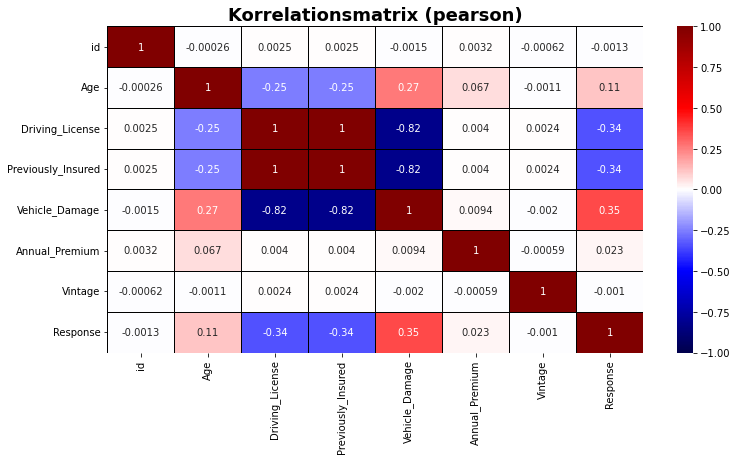

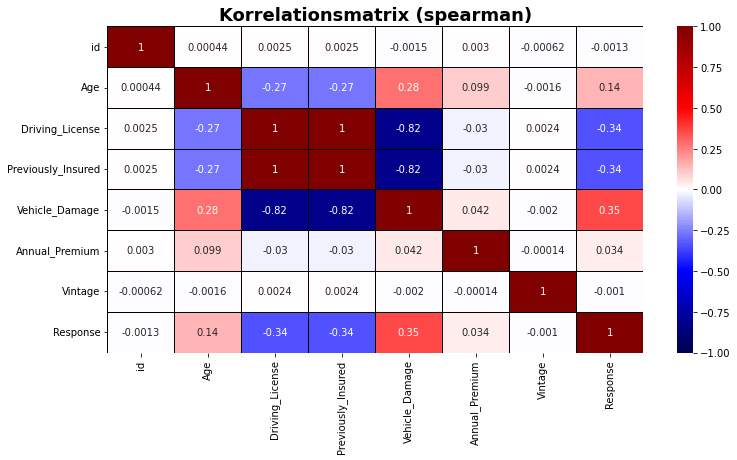

In [26]:
def correlation_matrix_plot(train_dataset, x, y, show_labels, col_map, method=""):
    correlation = train_dataset.corr(method=method)
    plt.figure(figsize=(x, y))
    sns.heatmap(
        correlation, annot=show_labels, linewidths=1, linecolor="black", cmap=col_map, vmin=-1, vmax=1
    )
    plt.title(f"Korrelationsmatrix ({method})", fontsize=18, weight="bold")


correlation_matrix_plot(train_dataset, 12, 6, True, "seismic", "pearson")
correlation_matrix_plot(train_dataset, 12, 6, True, "seismic", "spearman")

- Es fällt auf, dass `Previously_Insured` und `Driving_License` die höchste Korrelation, undzwar von 1, aufweisen. Das liegt daran, dass jeder KFZ-Besitzer eine KFZ-Versicherung haben muss sofern das KFZ angemeldet ist.
- Die geringste Korrelation weisen die Variablen `Driving_License` und `Vintage`, sowie `Previously_Insured` und `Vintage` auf, mit einer Korrelation von 0,0024.
- Hohe negative Korrelation zwischen `Vehicle_Damage` und `Previously_Insured`.
- Korrelation von 0,35 zwischen `Vehicle_Damage` und `Response`. Wenn ich in der Vergangenheit einen Schadensfall hatte, bin ich eher dazu geneigt eine Versicherung abzuschließen.
- Die Korrelationen von `Vintage` liege nahe an 0. 

In [27]:
print(f'In wie vielen Fällen ist Driving_License != Previously_Insured?\n -> {len(train_dataset.loc[train_dataset["Driving_License"] != train_dataset["Previously_Insured"]])}')
# Observation was confirmed!
# Columns Driving_License and Previously_Insured are equals!

In wie vielen Fällen ist Driving_License != Previously_Insured?
 -> 0


Die Spalten `Driving_License` und `Previously_Insured` beinhalten die gleichen Daten.

## 2.8 Interpretation der Variablen <a class="anchor" id="section_2_8"></a>

### 2.8.1 Interpretation der Variable Gender <a class="anchor" id="section_2_8_1"></a>

Die Variable `Gender` beschreibt das Geschlecht der Kunden. Diese ist eine kategoriale Variable mit den zwei Ausprägungen `Male` und `Female`.

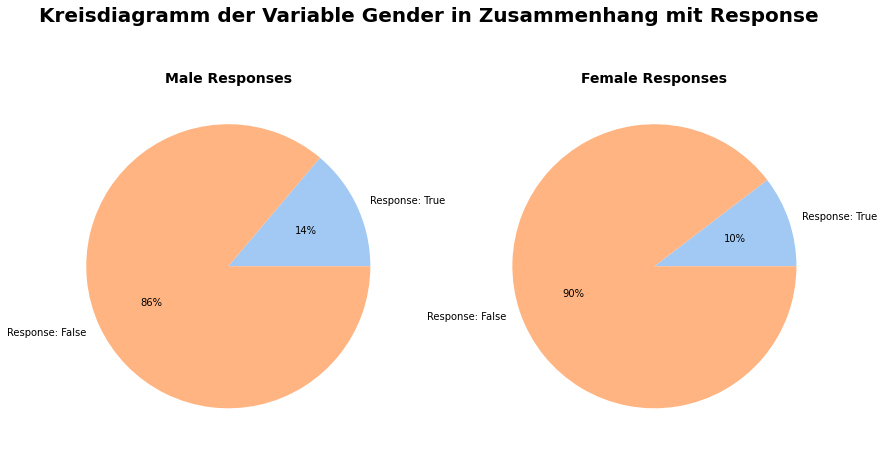

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 14))
colors = sns.color_palette('pastel')[0:2]
l = ["Response: True", "Response: False"]
fig.suptitle("Kreisdiagramm der Variable Gender in Zusammenhang mit Response", fontsize=20, weight="bold")
plt.subplots_adjust(top=1.32)


# MALE PIE CHART
male = train_dataset.loc[train_dataset["Gender"] == "Male"]
d_m = [len(male.loc[male["Response"] == True]),
       len(male.loc[male["Response"] == False])]
ax1.pie(d_m, labels=l, colors=colors, autopct='%.0f%%')
ax1.set_title("Male Responses", weight="bold", fontsize=14)

# FEMALE PIE CHART
female = train_dataset.loc[train_dataset["Gender"] == "Female"]
d_f = [len(female.loc[female["Response"] == True]),
       len(female.loc[female["Response"] == False])]
ax2.pie(d_f, labels=l, colors=colors, autopct='%.0f%%')
ax2.set_title("Female Responses", weight="bold", fontsize=14); # ";"" prevents output in console

**Beobachtungen**:
- Keine signifikanten unterschiede im Interesse an KFZ-Versicherungen bei Männern und Frauen

### 2.8.2 Interpretation der Variable Age <a class="anchor" id="section_2_8_2"></a>

Die Variable `Age` beschreibt das Alter der Kunden.

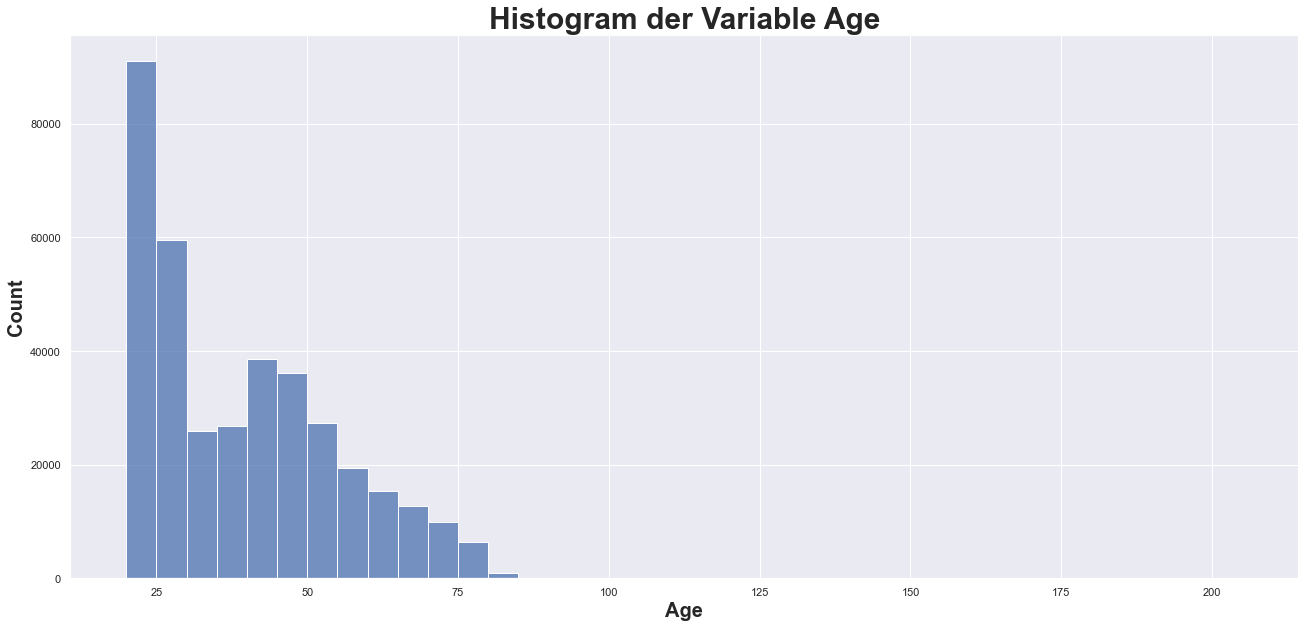

In [29]:
sns.set(rc={"figure.figsize": (22, 10)})
histplot_age = sns.histplot(train_dataset, x="Age", binwidth=5)
histplot_age.set_title("Histogram der Variable Age", fontsize=30, weight='bold')
histplot_age.set_xlabel("Age", fontsize=20, weight='bold')
histplot_age.set_ylabel("Count", fontsize=20, weight='bold');


**Beobachtungen:**
- Aus der Fallbeschreibung konnte entnommen werden, dass es sich um einen Datensatz aus Indien handelt. Es wurde von der Währung Rs (Indische Rupie) gesprochen. Die Altersverteilung kommt der pyramidenförmigen demografischen Verteilung von Indien deutlich näher als der Urnenform von Deutschland. Die geplottete Altersverteilung bestätigt zusätzlich die Datenherkunft und Datengüte, da die erwartete Verteilung, bis auf einen Sattelpunkt zwischen 30 Jahre und 40 Jahre, ausgegeben wurde.
- Es gibt keine Werte unter 20 Jahre.

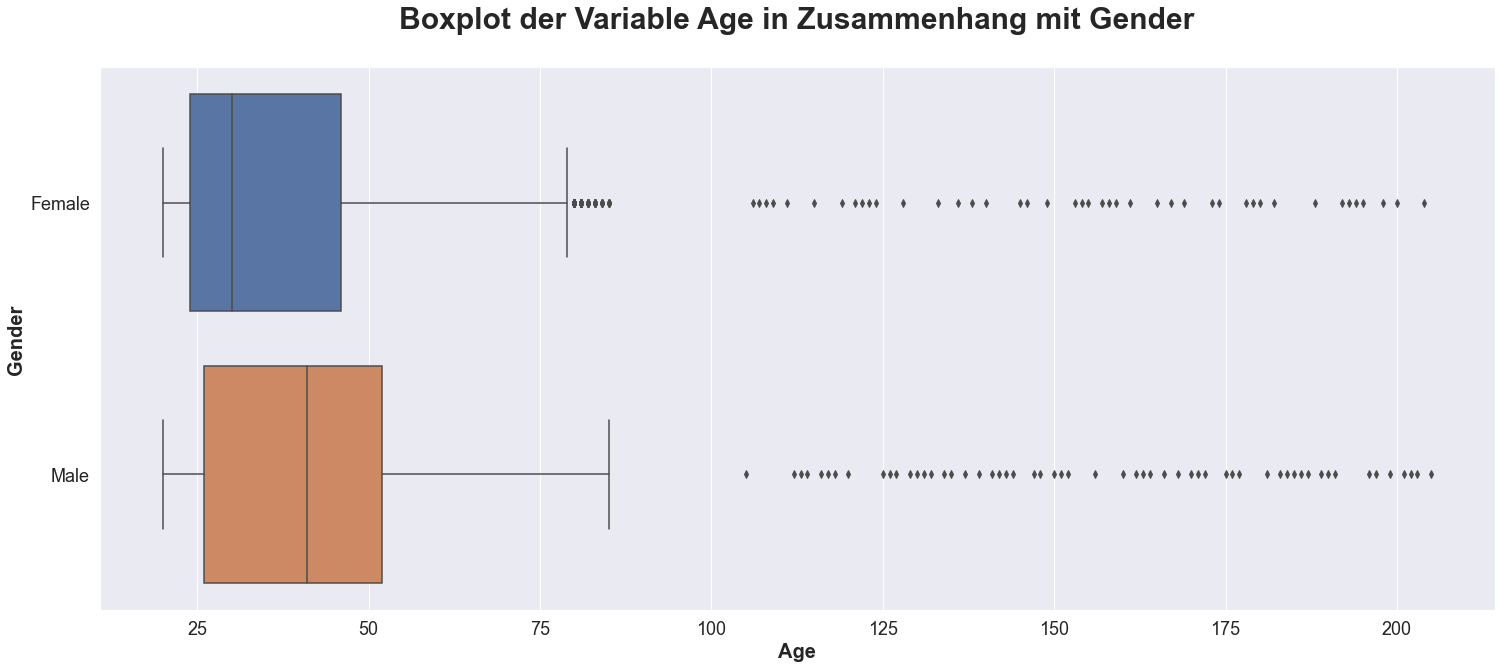

In [30]:
sns.set(rc={"figure.figsize": (25, 10)})
boxplot = sns.boxplot(data=train_dataset, y="Gender", x="Age", orient="horizontal")
boxplot.set_xlabel("Age", fontsize=20, weight='bold')
boxplot.set_ylabel("Gender", fontsize=20, weight='bold')
boxplot.set_title("Boxplot der Variable Age in Zusammenhang mit Gender" +
                  "\n", fontsize=30, weight='bold')
plt.tick_params(axis="both", labelsize=18)

**Beobachtungen**:
- Es gibt unrealistisch hohe Alterswerte.
- Männer sind im Schnitt älter als Frauen<br>

In [31]:
print(f'Durchschnittsalter von Männern: {train_dataset.loc[train_dataset["Gender"] == "Male"].mean().round()["Age"]}')
print(f'Durchschnittsalter von Frauen: {train_dataset.loc[train_dataset["Gender"] == "Female"].mean().round()["Age"]}')

Durchschnittsalter von Männern: 41.0
Durchschnittsalter von Frauen: 36.0


Alle Datensätze bei denen das Alter über 100 Jahren liegt, sind nicht realitätsnah und werden genauer betrachtet:

In [32]:
train_dataset.loc[(train_dataset.Age >= 100)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
2444,2445,Female,133,True,12.0,True,< 1 Year,False,29183.0,152.0,44,False
3734,3735,Male,171,False,28.0,False,1-2 Year,True,27966.0,163.0,48,True
4805,4806,Male,163,True,28.0,True,1-2 Year,False,2630.0,124.0,200,False
4858,4859,Male,144,True,26.0,True,< 1 Year,False,30869.0,152.0,288,False
5635,5636,Male,187,False,33.0,False,< 1 Year,True,35397.0,124.0,96,True
...,...,...,...,...,...,...,...,...,...,...,...,...
191789,191790,Male,117,False,28.0,False,> 2 Years,True,47282.0,26.0,62,True
191977,191978,Male,120,False,5.0,False,< 1 Year,True,27514.0,26.0,31,False
192630,192631,Female,108,True,11.0,True,< 1 Year,False,28031.0,152.0,22,False
195149,195150,Male,168,True,10.0,True,< 1 Year,False,2630.0,152.0,26,False


Die Daten mit unrealistisch hohen Alterswerten sind möglicherweise alte Datensätze, die nicht gepflegt bzw. im Fall der Vertragsauflösung nicht gelöscht wurden.

### 2.8.3 Interpretation der Variable Driving_License <a class="anchor" id="section_2_8_3"></a>

Die Variable `Driving_License` beschreibt ob ein Kunde einen Führerschein besitzt.

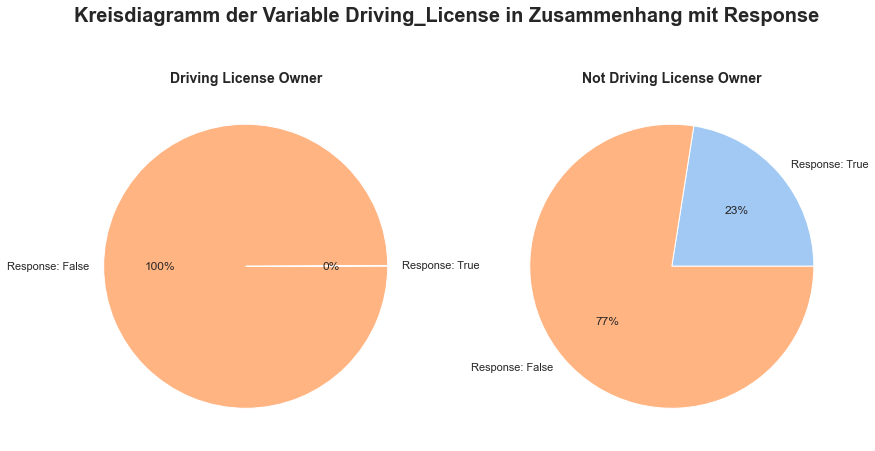

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 14))
colors = sns.color_palette('pastel')[0:4]
fig.suptitle("Kreisdiagramm der Variable Driving_License in Zusammenhang mit Response", fontsize=20, weight="bold")
plt.subplots_adjust(top=1.32)

dl_true = train_dataset.loc[train_dataset["Driving_License"] == True]
dl_false=train_dataset.loc[train_dataset["Driving_License"] == False]

# dl_true PIE CHART
d_true = [len(dl_true.loc[dl_true["Response"] == True]),
       len(dl_true.loc[dl_true["Response"] == False])]
l_true = ["Response: True", "Response: False"]
ax1.pie(d_true, labels=l_true, colors=colors, autopct='%.0f%%')
ax1.set_title("Driving License Owner", weight="bold", fontsize=14)

# dl_false PIE CHART
d_false = [len(dl_false.loc[dl_false["Response"] == True]),
       len(dl_false.loc[dl_false["Response"] == False])]
l_false = l_true

ax2.pie(d_false, labels=l_false, colors=colors, autopct='%.0f%%')
ax2.set_title("Not Driving License Owner", weight="bold", fontsize=14);

**Beobachtungen**:
- Kein Führerscheinbesitzer ist an einer KFZ-Versicherung interessiert. Möglicherweise weil Führerscheinbesitzer auch ein Auto und deswegen auch eine KFZ-Versicherung besitzen.
- 23% aller Führerscheinlosen haben Interesse an einer KFZ-Versicherung bekundet.

### 2.8.4 Interpretation der Variable Region_Code <a class="anchor" id="section_2_8_4"></a>

Die Variable `Region_Code` beschreibt den Wohnort der Kunden. 

In [34]:
len(train_dataset["Region_Code"].unique())

53

Bei dieser Variable handelt es sich um eine kategoriale Variable mit 53 Ausprägungen. Sie kann analog zur Postleitzahl verstanden werden.

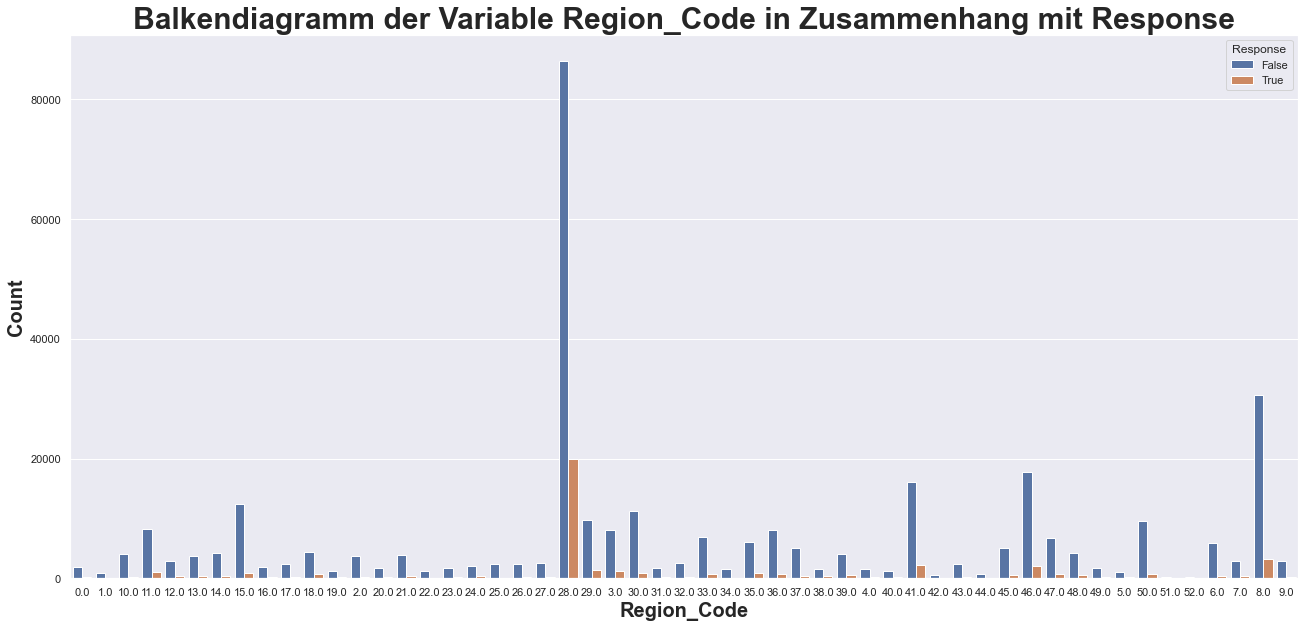

In [35]:
sns.set(rc={"figure.figsize": (22, 10)})
countplot_region_code = sns.countplot(data=train_dataset, x="Region_Code", hue="Response") 
countplot_region_code.set_title("Balkendiagramm der Variable Region_Code in Zusammenhang mit Response", fontsize=30, weight='bold')
countplot_region_code.set_xlabel("Region_Code", fontsize=20, weight='bold')
countplot_region_code.set_ylabel("Count", fontsize=20, weight='bold'); 

**Beobachtungen:**
- Es fällt auf das die meisten Kunden aus dem Verkaufskanal 28.0 kommen und dementsprechend die Nachfrage nach einer KFZ-Versicherung am größten ist. Das könnte vielleicht daran liegen das es sich um eine gute Wohngegend handelt und sich die Versicherungsnehmer eher ein Fahrzeug und somit eine KFZ-Versicherung leisten können.

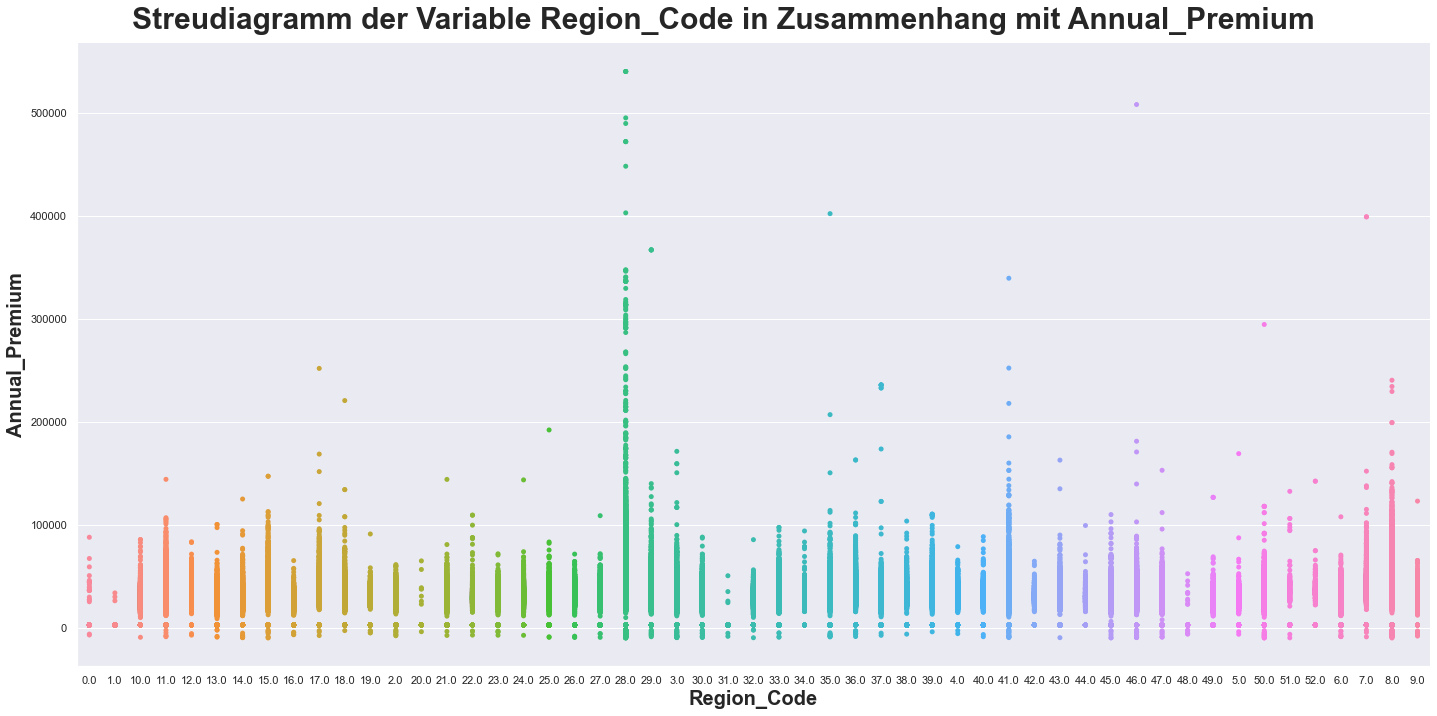

In [36]:
catplot_region_code = sns.catplot(data=train_dataset, x="Region_Code", y="Annual_Premium", jitter=False, height=10, aspect= 2/1)
catplot_region_code.fig.subplots_adjust(top=0.93)
catplot_region_code.fig.suptitle("Streudiagramm der Variable Region_Code in Zusammenhang mit Annual_Premium", fontsize=30, weight='bold')
catplot_region_code.set_xlabels("Region_Code", fontsize=20, weight='bold')
catplot_region_code.set_ylabels("Annual_Premium", fontsize=20, weight='bold');

**Beobachtungen:**
- In einigen Verkaufskanälen ist die jährliche Zahlung an die Krankenversicherung unrealistisch hoch. Zudem haben einige Verkaufskanäle negative jährliche Zahlungen, was deutlich einen Fehler darstellt.


### 2.8.5 Interpretation der Variable Previously_Insured <a class="anchor" id="section_2_8_5"></a>

Die Variable `Previously_Insured` beschreibt ob ein Kunde eine KFZ-Versicherung besitzt.

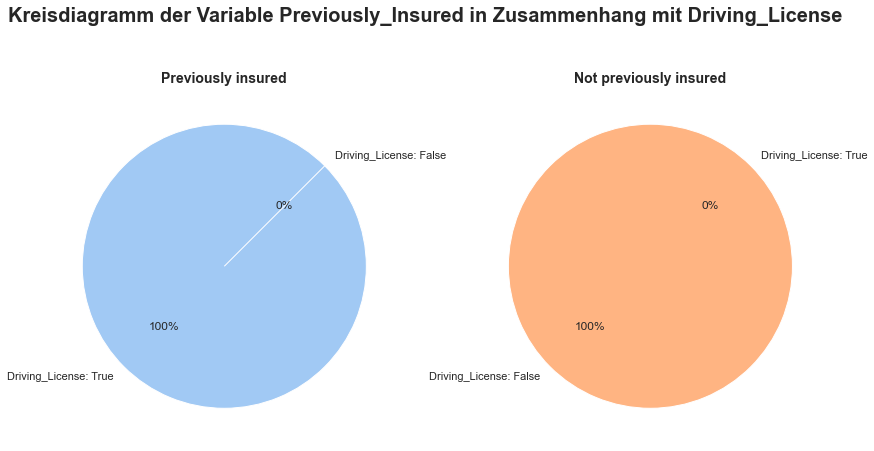

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 14))
colors = sns.color_palette('pastel')[0:2]
l = ["Driving_License: True", "Driving_License: False"]
fig.suptitle("Kreisdiagramm der Variable Previously_Insured in Zusammenhang mit Driving_License", fontsize=20, weight="bold")
plt.subplots_adjust(top=1.32)

d_1 = train_dataset.loc[train_dataset["Previously_Insured"] == True]
p_1 = [len(d_1.loc[d_1["Driving_License"] == True]),
       len(d_1.loc[d_1["Driving_License"] == False])]
ax1.pie(p_1, labels=l, colors=colors, autopct='%.0f%%', startangle = 45)
ax1.set_title("Previously insured", weight="bold", fontsize=14)

d_2 = train_dataset.loc[train_dataset["Previously_Insured"] == False]
p_2 = [len(d_2.loc[d_2["Driving_License"] == True]),
       len(d_2.loc[d_2["Driving_License"] == False])]
ax2.pie(p_2, labels=l, colors=colors, autopct='%.0f%%', startangle = 45)
ax2.set_title("Not previously insured", weight="bold", fontsize=14);

**Beobachtungen:**
- Kunden die einen Führerschein besitzen haben eine KFZ-Versicherung abgeschlossen. 
- Kunden die keinen Führerschein besitzen haben keine KFZ-Versicherung abgeschlossen.

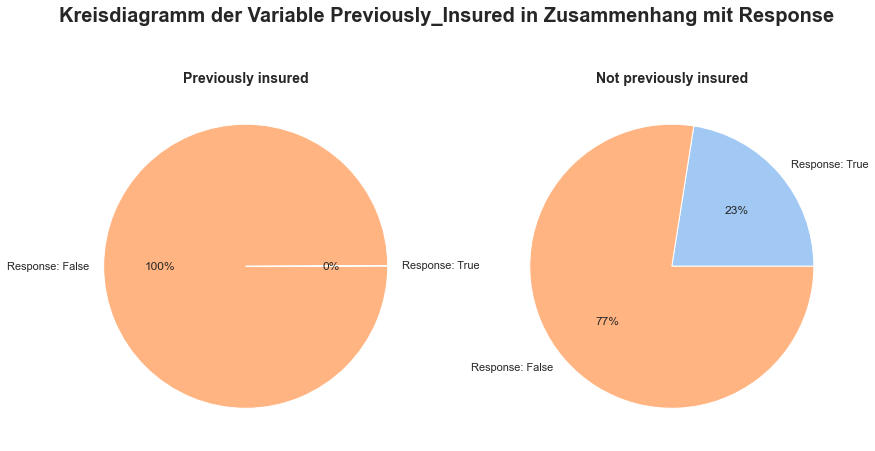

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 14))
colors = sns.color_palette('pastel')[0:2]
l = ["Response: True", "Response: False"]
fig.suptitle("Kreisdiagramm der Variable Previously_Insured in Zusammenhang mit Response", fontsize=20, weight="bold")
plt.subplots_adjust(top=1.32)

d_1 = train_dataset.loc[train_dataset["Previously_Insured"] == True]
p_1 = [len(d_1.loc[d_1["Response"] == True]),
       len(d_1.loc[d_1["Response"] == False])]
ax1.pie(p_1, labels=l, colors=colors, autopct='%.0f%%')
ax1.set_title("Previously insured", weight="bold", fontsize=14)

d_2 = train_dataset.loc[train_dataset["Previously_Insured"] == False]
p_2 = [len(d_2.loc[d_2["Response"] == True]),
       len(d_2.loc[d_2["Response"] == False])]
ax2.pie(p_2, labels=l, colors=colors, autopct='%.0f%%')
ax2.set_title("Not previously insured", weight="bold", fontsize=14);

**Beobachtungen:**
- Kunden die eine KFZ-Versicherung haben sind an keiner KFZ-Versicherung interessiert.
- 77% der Kunden die keine KFZ-Versicherung haben sind auch an keiner KFZ-Versicherung interessiert. 23% der Kunden die keine KFZ-Versicherung haben sind an einer KFZ-Versicherung interessiert.

### 2.8.6 Interpretation der Variable Vehicle_Age <a class="anchor" id="section_2_8_6"></a>

Die Variable `Vehicle_Age` beschreibt das Alter des Fahrzeugs. Diese ist eine kategoriale Variable mit den drei Ausprägungen `< 1 Year`, `1-2 Year` und `> 2 Years`.

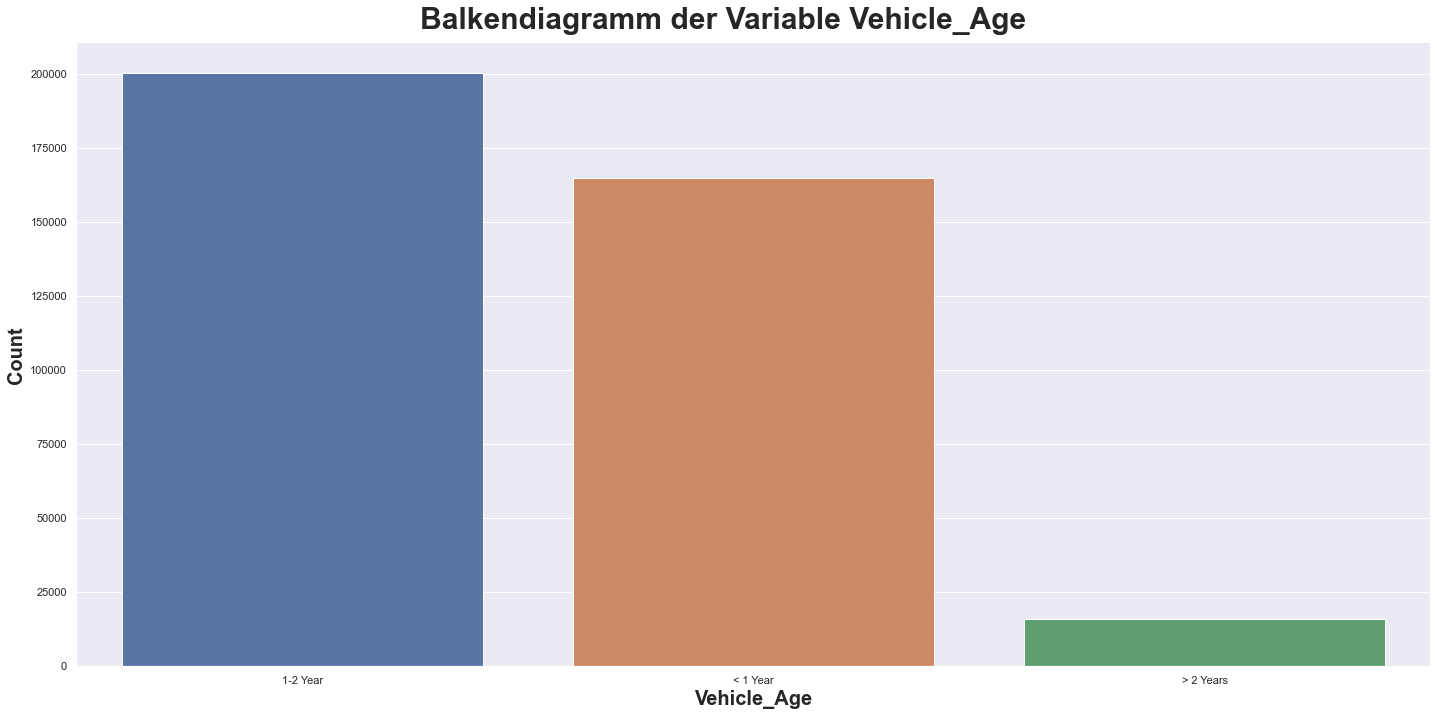

In [39]:
catplot_region_code = sns.catplot(data=train_dataset, x="Vehicle_Age", kind="count", height=10, aspect= 2/1)
catplot_region_code.fig.subplots_adjust(top=0.93)
catplot_region_code.fig.suptitle("Balkendiagramm der Variable Vehicle_Age", fontsize=30, weight='bold')
catplot_region_code.set_xlabels("Vehicle_Age", fontsize=20, weight='bold')
catplot_region_code.set_ylabels("Count", fontsize=20, weight='bold');

**Beobachtungen:**
- Kunden die ein Fahrzeug besitzen das 1-2 Jahre Alt ist, sind am häufigsten vorhanden mit ca. 200.000 Datensätzen. Fahrzeuge die unter einem Jahr alt sind, sind ebenfalls häufig vorhanden mit ca. 165.000 Datensätzen. Fahrzeuge die über 2 Jahre alt sind, sind nicht sehr häufig vorhanden mit ca. 20.000 Datensätzen.

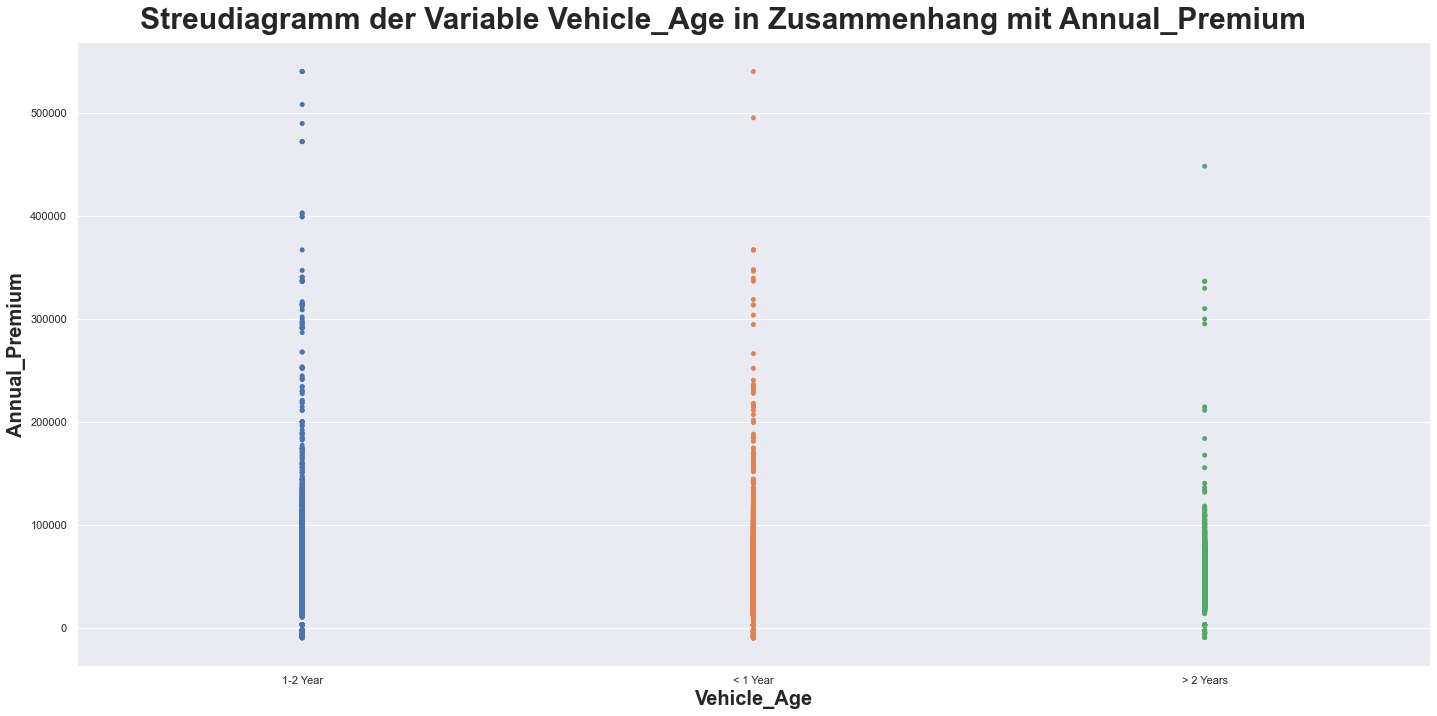

In [40]:
catplot_region_code = sns.catplot(data=train_dataset, x="Vehicle_Age", y="Annual_Premium", jitter=False, height=10, aspect= 2/1)
catplot_region_code.fig.subplots_adjust(top=0.93)
catplot_region_code.fig.suptitle("Streudiagramm der Variable Vehicle_Age in Zusammenhang mit Annual_Premium", fontsize=30, weight='bold')
catplot_region_code.set_xlabels("Vehicle_Age", fontsize=20, weight='bold')
catplot_region_code.set_ylabels("Annual_Premium", fontsize=20, weight='bold');


**Beobachtungen:**
- Kunden deren Fahrzeuge 1-2 Jahre alt und unter einem Jahr sind haben die höchsten zu zahlenden jährlichen Beträge an die Krankenversicherung. Dies könnte auf einen Fehler hindeuten, da die Beträge für die Krankenversicherung deutlich zu hoch ausfallen. 

In [41]:
print(f'Durchschnittszahlungen an die Krankenversicherung wenn das Auto <1 Jahr alt ist: {train_dataset.loc[train_dataset["Vehicle_Age"] == "< 1 Year"].mean().round(2)["Annual_Premium"]} Rupien')
print(f'Durchschnittszahlungen an die Krankenversicherung wenn das Auto 1-2 Jahre alt ist: {train_dataset.loc[train_dataset["Vehicle_Age"] == "1-2 Year"].mean().round(2)["Annual_Premium"]} Rupien')
print(f'Durchschnittszahlungen an die Krankenversicherung wenn das Auto mehr als 2 Jahre alt ist: {train_dataset.loc[train_dataset["Vehicle_Age"] == "> 2 Years"].mean().round(2)["Annual_Premium"]} Rupien')

Durchschnittszahlungen an die Krankenversicherung wenn das Auto <1 Jahr alt ist: 30082.84 Rupien
Durchschnittszahlungen an die Krankenversicherung wenn das Auto 1-2 Jahre alt ist: 30487.86 Rupien
Durchschnittszahlungen an die Krankenversicherung wenn das Auto mehr als 2 Jahre alt ist: 35613.25 Rupien


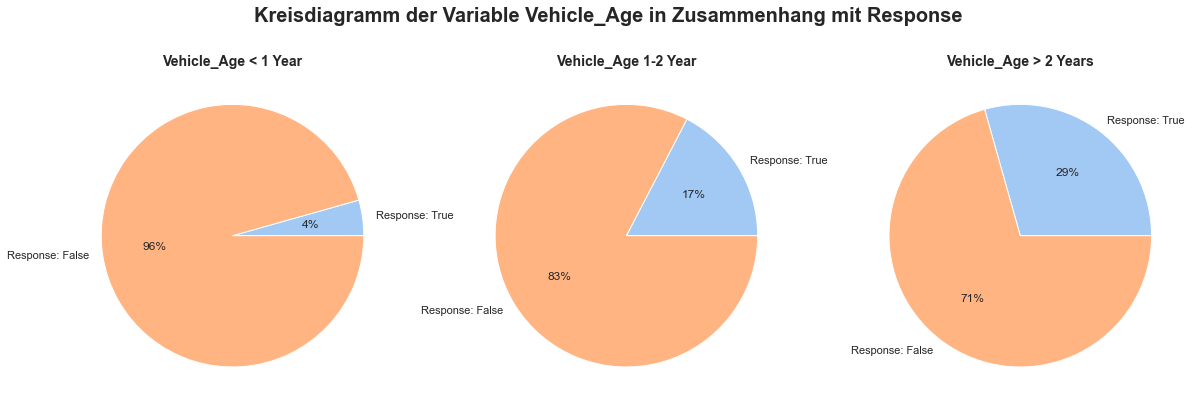

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
colors = sns.color_palette('pastel')[0:2]
fig.suptitle("Kreisdiagramm der Variable Vehicle_Age in Zusammenhang mit Response", fontsize=20, weight="bold")
plt.subplots_adjust(top=1.2)

dl_1 = train_dataset.loc[train_dataset["Vehicle_Age"] == "< 1 Year"]
dl_2 = train_dataset.loc[train_dataset["Vehicle_Age"] == "1-2 Year"]
dl_3 = train_dataset.loc[train_dataset["Vehicle_Age"] == "> 2 Years"]

l = ["Response: True", "Response: False"]
# dl_1 PIE CHART
d_1 = [len(dl_1.loc[dl_1["Response"] == True]),
       len(dl_1.loc[dl_1["Response"] == False])]
ax1.pie(d_1, labels=l, colors=colors, autopct='%.0f%%')
ax1.set_title("Vehicle_Age < 1 Year", weight="bold", fontsize=14)

# dl_2 PIE CHART
d_2 = [len(dl_2.loc[dl_2["Response"] == True]),
       len(dl_2.loc[dl_2["Response"] == False])]
ax2.pie(d_2, labels=l, colors=colors, autopct='%.0f%%')
ax2.set_title("Vehicle_Age 1-2 Year", weight="bold", fontsize=14)

# dl_3 PIE CHART
d_3 = [len(dl_3.loc[dl_3["Response"] == True]),
       len(dl_3.loc[dl_3["Response"] == False])]
ax3.pie(d_3, labels=l, colors=colors, autopct='%.0f%%')
ax3.set_title("Vehicle_Age > 2 Years", weight="bold", fontsize=14);


**Beobachtungen:**
- Je Älter das Auto, desto interessierter sind die Kunden an einer KFZ-Versicherung. 

### 2.8.7 Interpretation der Variable Vehicle_Damage <a class="anchor" id="section_2_8_7"></a>

Die Variable `Vehicle_Damage` beschreibt, ob es an einem Fahrzeug schonmal einen Schadensfall gab.


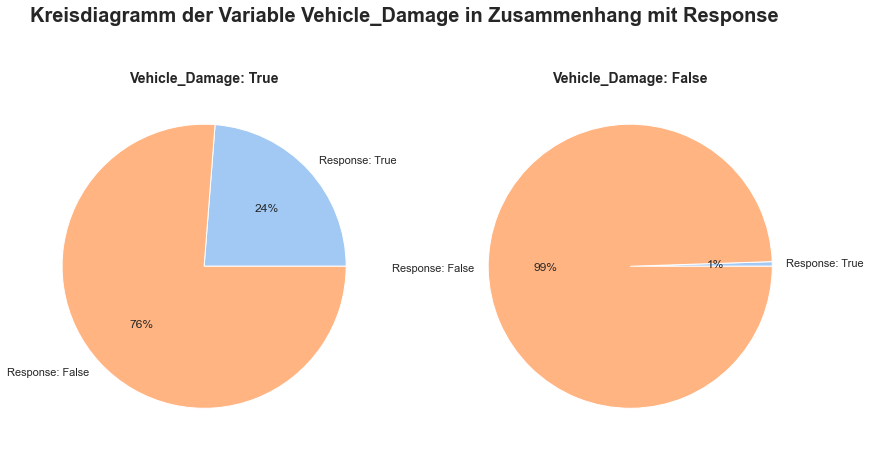

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 14))
colors = sns.color_palette('pastel')[0:2]
fig.suptitle("Kreisdiagramm der Variable Vehicle_Damage in Zusammenhang mit Response", fontsize=20, weight="bold")
plt.subplots_adjust(top=1.32)

dl_1 = train_dataset.loc[train_dataset["Vehicle_Damage"] ==True]
dl_2 = train_dataset.loc[train_dataset["Vehicle_Damage"] == False]

l = ["Response: True", "Response: False"]
# dl_1 PIE CHART
d_1 = [len(dl_1.loc[dl_1["Response"] == True]),
       len(dl_1.loc[dl_1["Response"] == False])]
ax1.pie(d_1, labels=l, colors=colors, autopct='%.0f%%')
ax1.set_title("Vehicle_Damage: True", weight="bold", fontsize=14)

# dl_2 PIE CHART
d_2 = [len(dl_2.loc[dl_2["Response"] == True]),
       len(dl_2.loc[dl_2["Response"] == False])]
ax2.pie(d_2, labels=l, colors=colors, autopct='%.0f%%')
ax2.set_title("Vehicle_Damage: False", weight="bold", fontsize=14);

**Beobachtungen:**
- Es sind 24% an einer KFZ-Versicherung interessiert die bereits einen Schadensfall erlitten haben. 
- 1% sind an einer KFZ-Versicherung interessiert die bisher keinen Schadensfall erlitten haben.



### 2.8.8 Interpretation der Variable Annual_Premium <a class="anchor" id="section_2_8_8"></a>

Die Variable `Annual_Premium` beschreibt die Höhe des jährlichen Versicherungsbeitrag der Krankenversicherung des Kunden.

In [44]:
train_dataset["Annual_Premium"].describe()

count    380999.000000
mean      30527.700690
std       17242.997675
min       -9997.000000
25%       24371.000000
50%       31656.000000
75%       39390.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

- Der durchschnittliche `Annual_Premium` liegt bei rund 30.500 Rupien.
- Das Minimun ist negativ, was auf mindestens einen fehlerhaften Wert hindeutet.
- Das Maximum liegt bei ca. 540.000 Rupien, was auf einen Fehler hindeuten könnte. 

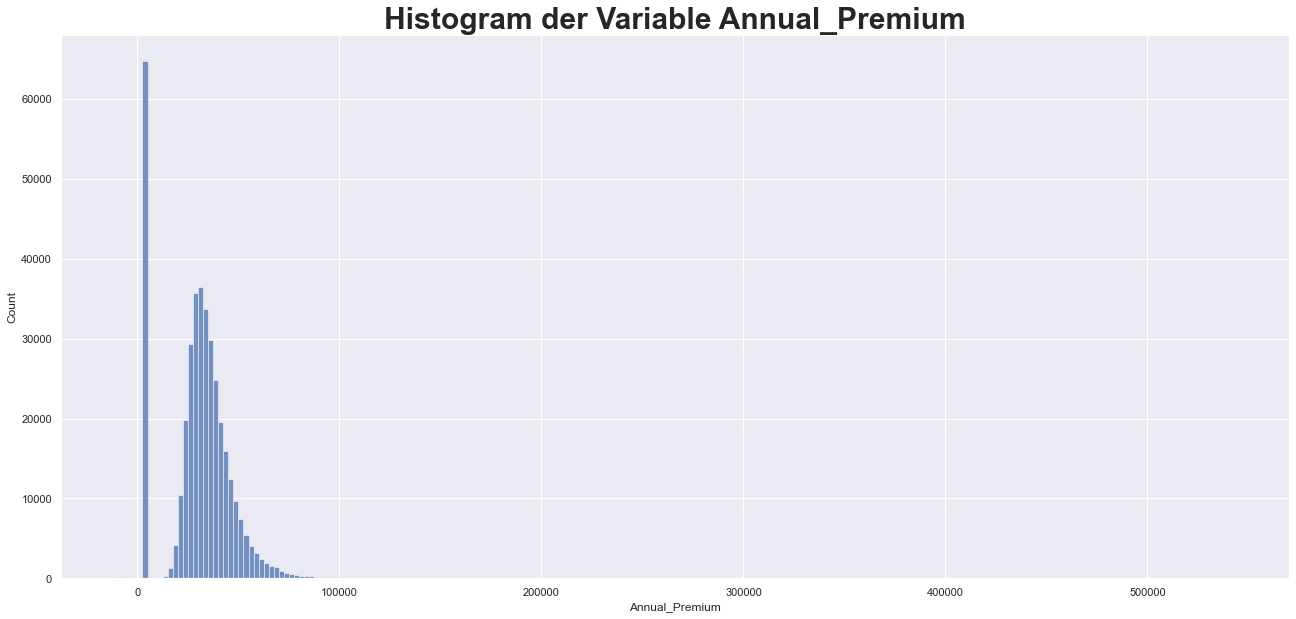

In [45]:
sns.set(rc={"figure.figsize": (22, 10)})
histplot_annual_premium = sns.histplot(train_dataset, x="Annual_Premium", binwidth=2500)
histplot_annual_premium.set_title("Histogram der Variable Annual_Premium", fontsize=30, weight='bold')
histplot_age.set_xlabel("Age", fontsize=20, weight='bold')
histplot_age.set_ylabel("Count", fontsize=20, weight='bold');

In [46]:
print(f"Anzahl der Datensätze bei ca. 2500 Rupien : {len(train_dataset.loc[(train_dataset['Annual_Premium'] >= 0) & (train_dataset['Annual_Premium'] < 3000)])} Datensätze")
print(f"Anzahl der Datensätze zwischen 3000 Rupien und 100.000 Rupien: {len(train_dataset.loc[(train_dataset['Annual_Premium'] >= 3000) & (train_dataset['Annual_Premium'] < 100000)])} Datensätze")
print(f"Anzahl der Datensätze ab 100.000 Rupien: {len(train_dataset.loc[train_dataset['Annual_Premium'] >= 100000])} Datensätze")
print(f"Anzahl der Datensätze negativer Beträge: {len(train_dataset.loc[train_dataset['Annual_Premium'] < 0])} Datensätze")

Anzahl der Datensätze bei ca. 2500 Rupien : 64805 Datensätze
Anzahl der Datensätze zwischen 3000 Rupien und 100.000 Rupien: 315052 Datensätze
Anzahl der Datensätze ab 100.000 Rupien: 775 Datensätze
Anzahl der Datensätze negativer Beträge: 367 Datensätze


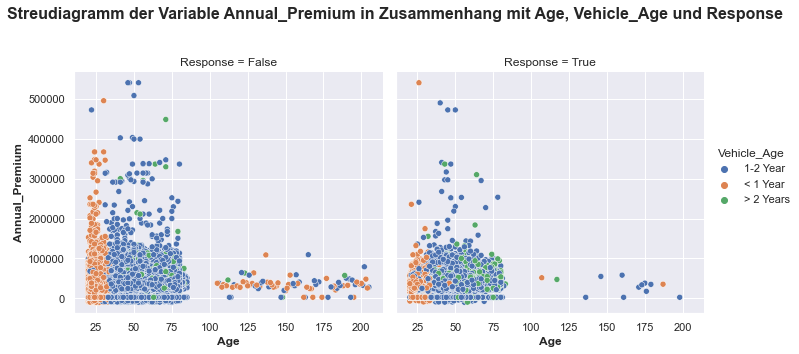

In [47]:
sns.set(rc={"figure.figsize": (22, 10)})
relplot = sns.relplot(data=train_dataset, x="Age", y="Annual_Premium",
                col="Response", hue="Vehicle_Age")
relplot.fig.subplots_adjust(top=0.8)
relplot.fig.suptitle("Streudiagramm der Variable Annual_Premium in Zusammenhang mit Age, Vehicle_Age und Response", fontsize=16, weight='bold')
relplot.set_xlabels("Age", fontsize=12, weight='bold')
relplot.set_ylabels("Annual_Premium", fontsize=12, weight='bold');

**Beobachtungen:**
- Kunden die kein Interesse an einer KFZ-Versicherung haben zahlen höhere jährliche Beträge an die Krankenkasse.
- Jüngere Kunden haben überwiegend ein Fahrzeug das unter einem Jahr alt ist.
- Kunden zwischen 50 Jahren und 80 Jahren haben Fahrzeuge die über 2 Jahre alt sind.
- Kunden deren Fahrzeug zwischen 1-2 Jahre alt sind, sind in allen Altersgruppen verteilt.
- Mehr Kunden sind nicht an einer KFZ-Versicherung interessiert. Zudem lässt sich erkennen das die Kunden dazu geneigt sind eine KFZ-Versicherung abzuschließen wenn der jährlich zu zahlende Betrag an die Krankenversicherung nicht so hoch ist. 

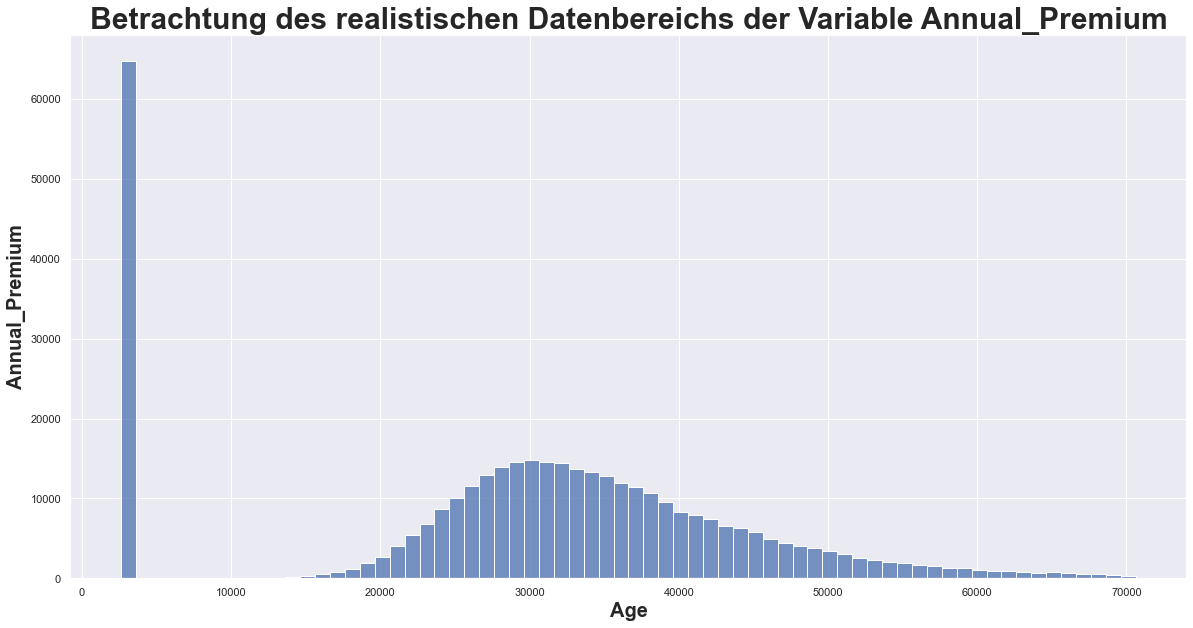

In [48]:
sns.set(rc={"figure.figsize": (20, 10)})

isolate_annual_premium = train_dataset.loc[(train_dataset["Annual_Premium"] > 0) &
                      (train_dataset["Annual_Premium"] < 70000)]

histplot_annual_premium = sns.histplot(isolate_annual_premium, x="Annual_Premium", binwidth=1000)
histplot_annual_premium.set_title("Betrachtung des realistischen Datenbereichs der Variable Annual_Premium", fontsize=30, weight='bold');
histplot_annual_premium.set_xlabel("Age", fontsize=20, weight='bold')
histplot_annual_premium.set_ylabel("Annual_Premium", fontsize=20, weight='bold');


Beobachtungen:
- rechtsschiefe Verteilung um 30.000 Rupien.
- Ausreißer bei rund 2.000 Rupien. Das ist möglicherweise ein besonderer Versicherungstarif, z.B. ein pauschaler Tarif.

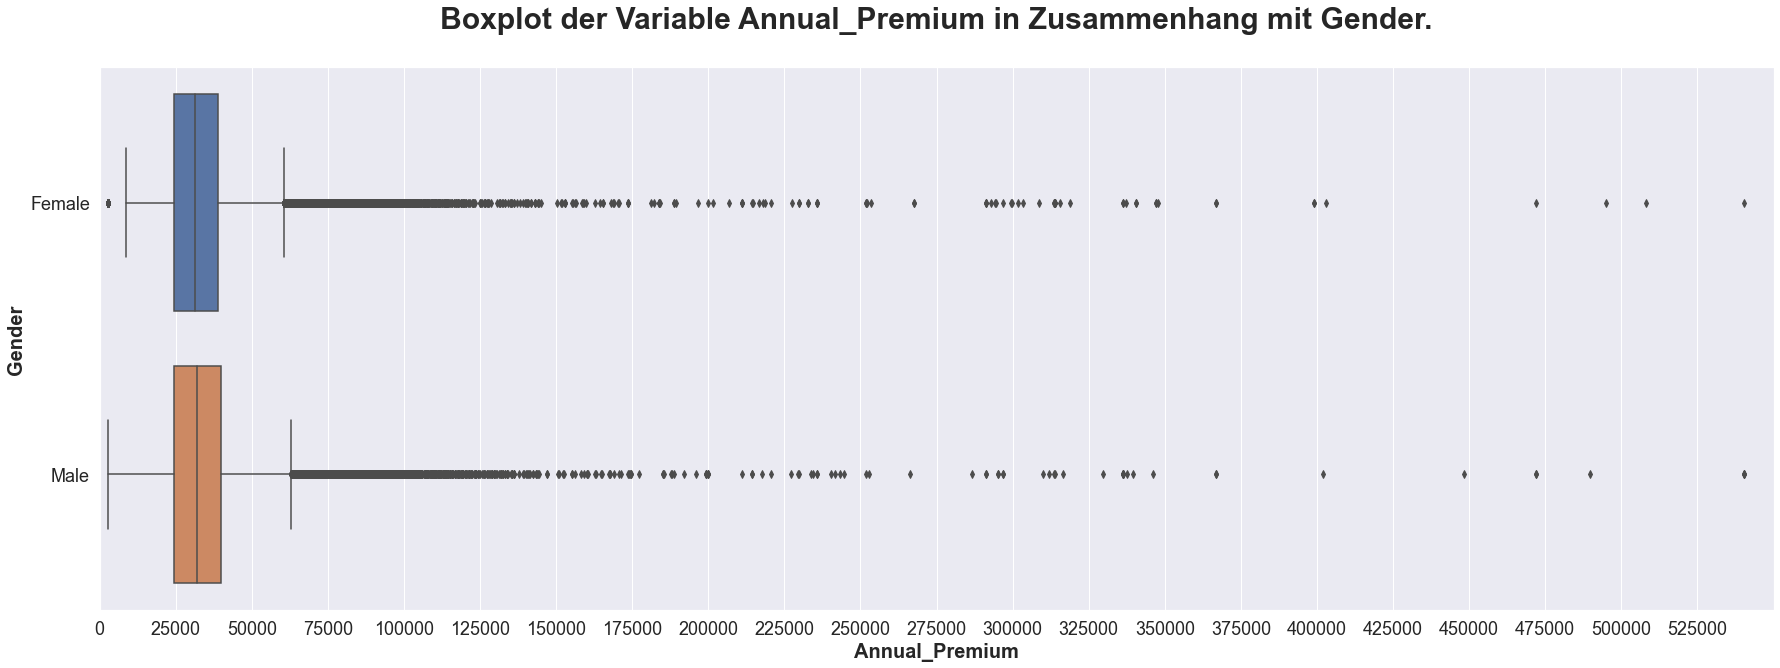

In [49]:
sns.set(rc={"figure.figsize": (30, 10)})
boxplot = sns.boxplot(data=train_dataset, y="Gender",
                      x="Annual_Premium", orient="horizontal")
boxplot.set_xlabel("Annual_Premium", fontsize=20, weight='bold')
boxplot.set_ylabel("Gender", fontsize=20, weight='bold')

boxplot.set_xlim(0, 550000)
boxplot.set_xticks(range(0, 550000, 25000))

boxplot.set_title("Boxplot der Variable Annual_Premium in Zusammenhang mit Gender." +
                  "\n", fontsize=30, weight='bold')
plt.tick_params(axis="both", labelsize=18)

**Beobachtungen**:
- Es gibt unrealistisch hohe jährliche Zahlungen an die Krankenversicherung. Zudem bei den Frauen unrealistisch niedrige Zahlungen.
- Männer und Frauen zahlen im Schnitt gleiche jährliche Zahlungen an die Krankenversicherung.

### 2.8.9 Interpretation der Variable Policy_Sales_Channel <a class="anchor" id="section_2_8_9"></a>

Die Variable `Policy_Sales_Channel` beschreibt den Verkaufskanal, über den die bestehende Krankenversicherung abgeschlossen wurde.

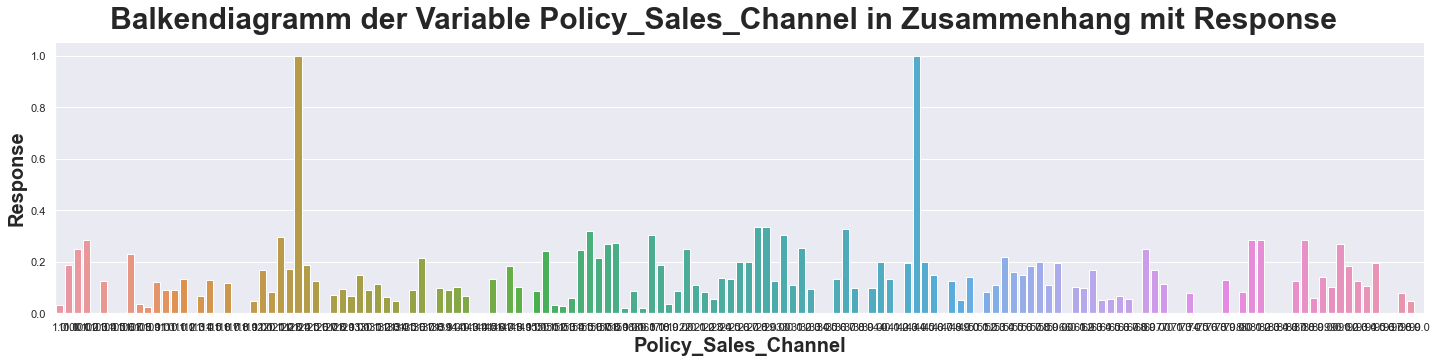

In [50]:
catplot_region_code = sns.catplot(x="Policy_Sales_Channel",y="Response", data=train_dataset, ci=None, aspect=4, kind="bar")
catplot_region_code.fig.subplots_adjust(top=0.88)
catplot_region_code.fig.suptitle("Balkendiagramm der Variable Policy_Sales_Channel in Zusammenhang mit Response", fontsize=30, weight='bold')
catplot_region_code.set_xlabels("Policy_Sales_Channel", fontsize=20, weight='bold')
catplot_region_code.set_ylabels("Response", fontsize=20, weight='bold');

**Beobachtungen**:
- Es gibt deutliche Unterschiede zwischen den Vertriebskanälen
    - Allerdings haben Vertriebskanäle mit wenigen Kunden extremere Werte, da die Stichprobengröße kleiner ist

Es müssen weitere Untersuchungen von prozentualer positiver Rückmeldung und Anzahl der Kunden für jeden Vertriebskanal vorgenommen werden.

Nachfolgend werden die Daten pro Vertriebskanal zusammengefasst, um deren Positivrückmeldungsrate im Vergleich zur Anzahl der betreuten Kunden einordnen zu können.

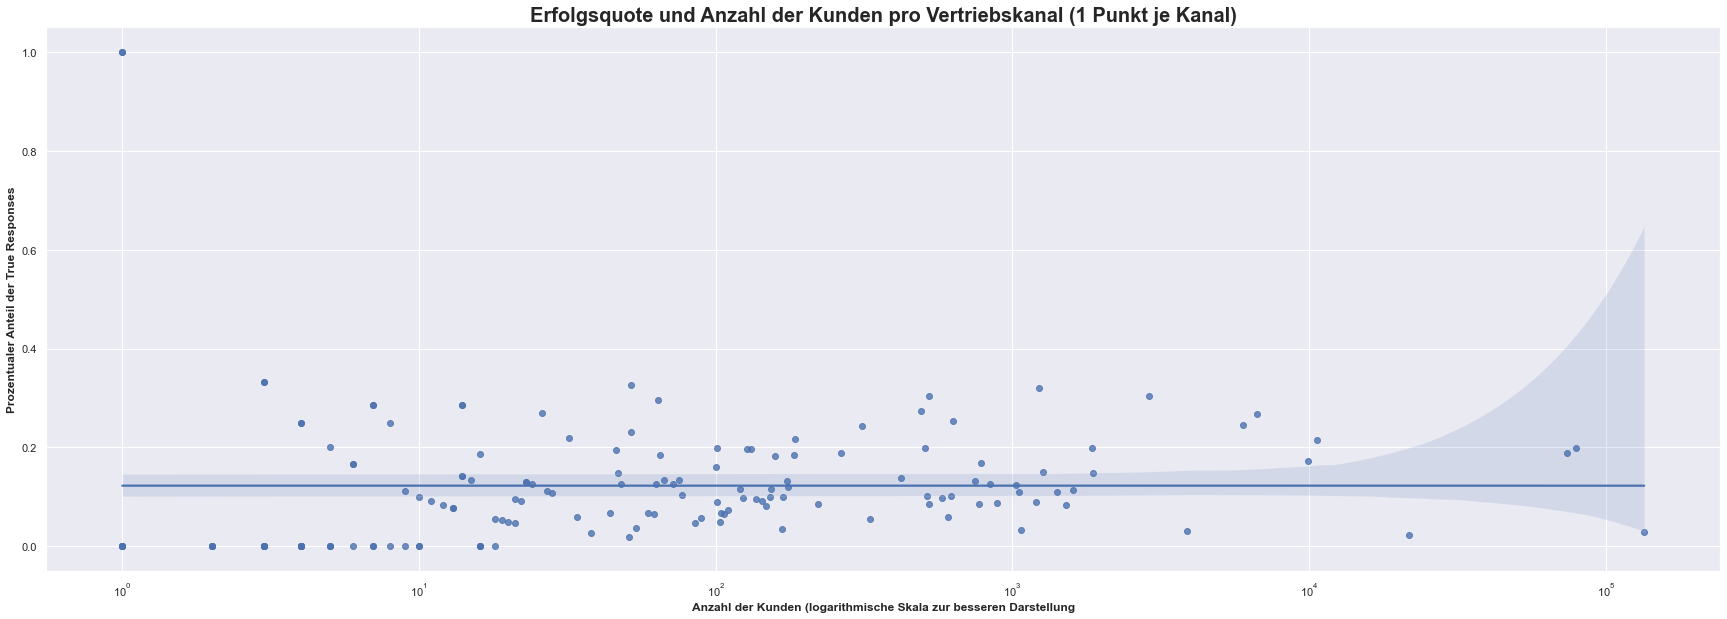

In [51]:
# get percentage of True response
percent =  train_dataset.groupby("Policy_Sales_Channel").sum() / train_dataset.groupby("Policy_Sales_Channel").count()
percent = percent.reset_index()
percent["Policy_Sales_Channel"] = percent["Policy_Sales_Channel"].astype(pd.CategoricalDtype(percent["Policy_Sales_Channel"].unique()))

# get count of all response
count = train_dataset.groupby("Policy_Sales_Channel").count()
count = count.reset_index()
count["Policy_Sales_Channel"] = count["Policy_Sales_Channel"].astype(pd.CategoricalDtype(count["Policy_Sales_Channel"].unique()))

# join results
combined = pd.merge(percent, count, how="inner", on=["Policy_Sales_Channel","Policy_Sales_Channel"], suffixes=["_percent", "_count"])
combined = combined.sort_values("Response_percent", ascending=False)

# trim useless columns
combined = combined[["Policy_Sales_Channel", "Response_percent", "Response_count"]]

no_positive_responses = combined.loc[combined["Response_percent"] == 0]
combined
# remove sales channels with no customers
combined = combined.loc[combined["Response_count"] > 0]
combined
p = sns.regplot(x="Response_count", y="Response_percent" ,data=combined)
p.set_xscale("log")
p.set_xlabel("Anzahl der Kunden (logarithmische Skala zur besseren Darstellung", weight="bold")
p.set_ylabel("Prozentualer Anteil der True Responses", weight="bold")
p.set_title("Erfolgsquote und Anzahl der Kunden pro Vertriebskanal (1 Punkt je Kanal)", size=20, weight="bold");

In [52]:
combined

,Policy_Sales_Channel,Response_percent,Response_count
97,43.0,1.000000,1
27,123.0,1.000000,1
80,28.0,0.333333,3
79,27.0,0.333333,3
89,36.0,0.326923,52
...,...,...,...
131,76.0,0.000000,4
133,79.0,0.000000,6
53,149.0,0.000000,1
104,50.0,0.000000,2


In [53]:
print(f"Anzahl der Vertriebskanäle ohne positive Response: {len(no_positive_responses)}")

Anzahl der Vertriebskanäle ohne positive Response: 34


**Beobachtungen**:
- Die Vertriebskanäle sind unabhängig von ihrer Größe mehr oder weniger erfolgreich
- Es gibt große Abweichungen vom Mittelwert unabhängig von der Anzahl der Kunden
- Wie erwartet haben die Vertriebskanäle mit 100% Positivrückmeldungsquote nur einen einzigen Kunden
    - Dennoch gibt es auch Vertriebskanäle mit über 1000 Kunden und rund 33% Positivquote
- Die meisten Vertriebskanäle haben weniger als 1000 Kunden
- Es gibt 34 Vertriebskanäle ohne positive Rückmeldung

### 2.8.10 Interpretation der Variable Vintage <a class="anchor" id="section_2_8_10"></a>

Die Variable `Vintage` beschreibt die Dauer des Versicherungsverhältnisses im letzten Jahr.

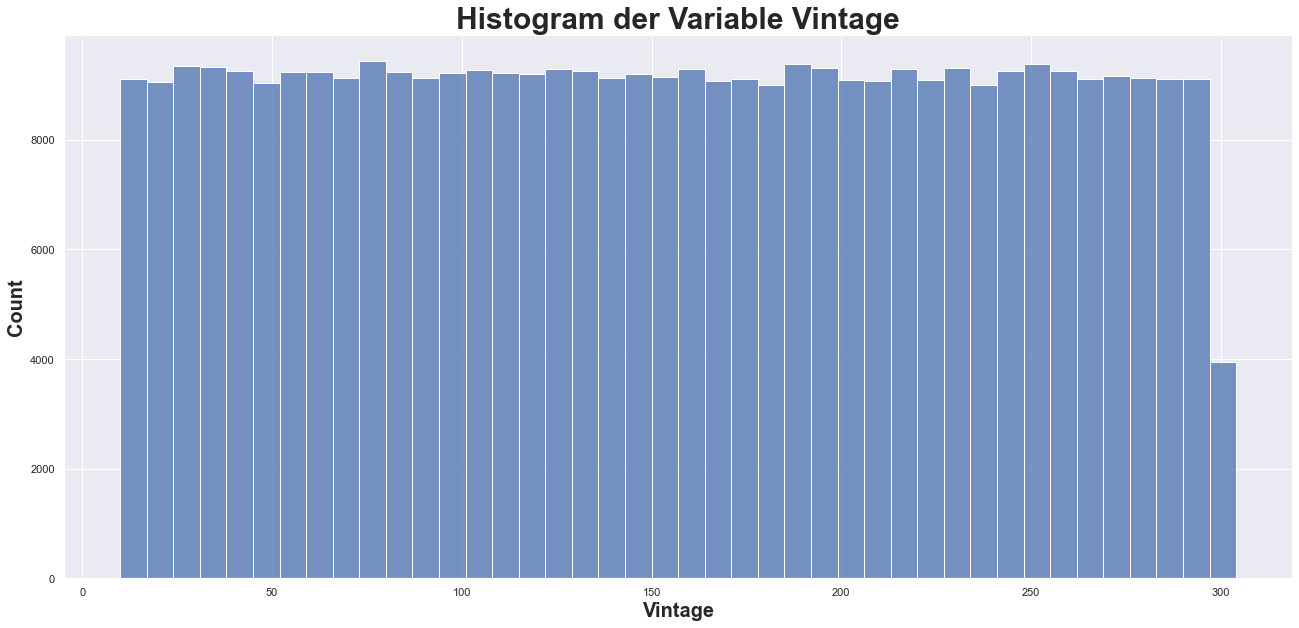

In [54]:
sns.set(rc={"figure.figsize": (22, 10)})
histplot = sns.histplot(data=train_dataset, x="Vintage", binwidth=7)      # binwidth = 7 days = 1 week
histplot.set_title("Histogram der Variable Vintage", fontsize=30, weight='bold')
histplot.set_xlabel("Vintage", fontsize=20, weight='bold')
histplot.set_ylabel("Count", fontsize=20, weight='bold');


**Beobachtungen**:
- Beinahe Gleichverteilung von `Vintage`. Es scheinen keine Verkaufsaktionen stattgefunden zu haben, oder sie sind ohne Erfolg geblieben.

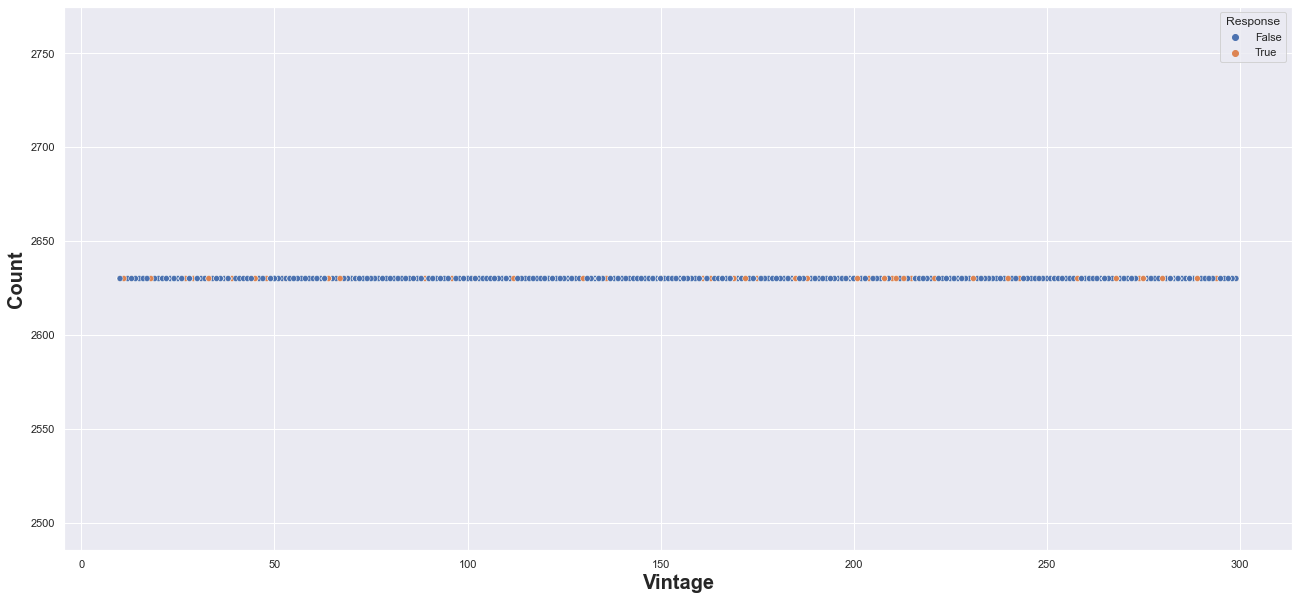

In [55]:
# Look at cheap contracts
d = train_dataset.loc[(train_dataset["Annual_Premium"] > 0) & (train_dataset["Annual_Premium"] < 3000)]

#d = d.loc[d["Response"] == True]

sns.set(rc={"figure.figsize": (22, 10)})
scatterplot = sns.scatterplot(data=d, x="Vintage", y="Annual_Premium", hue="Response")
scatterplot.set_xlabel("Vintage", fontsize=20, weight='bold')
scatterplot.set_ylabel("Count", fontsize=20, weight='bold');

**Beobachtungen**:
- Es gibt keine besonderen Zeiträume, in denen der günstige Pauschaltarif abgeschlossen wird
- Es gibt keine besonderen Zeiträume, in denen die  `Response` besonders gut ist

### 2.8.11 Interpretation der Variable Response <a class="anchor" id="section_2_8_11"></a>

Die Variable `Response` beschreibt das Interesse der Kunden an einer KFZ-Versicherung. Es ist die Zielvariable, die mithilfe eines Modells vorhergesagt werdern soll.

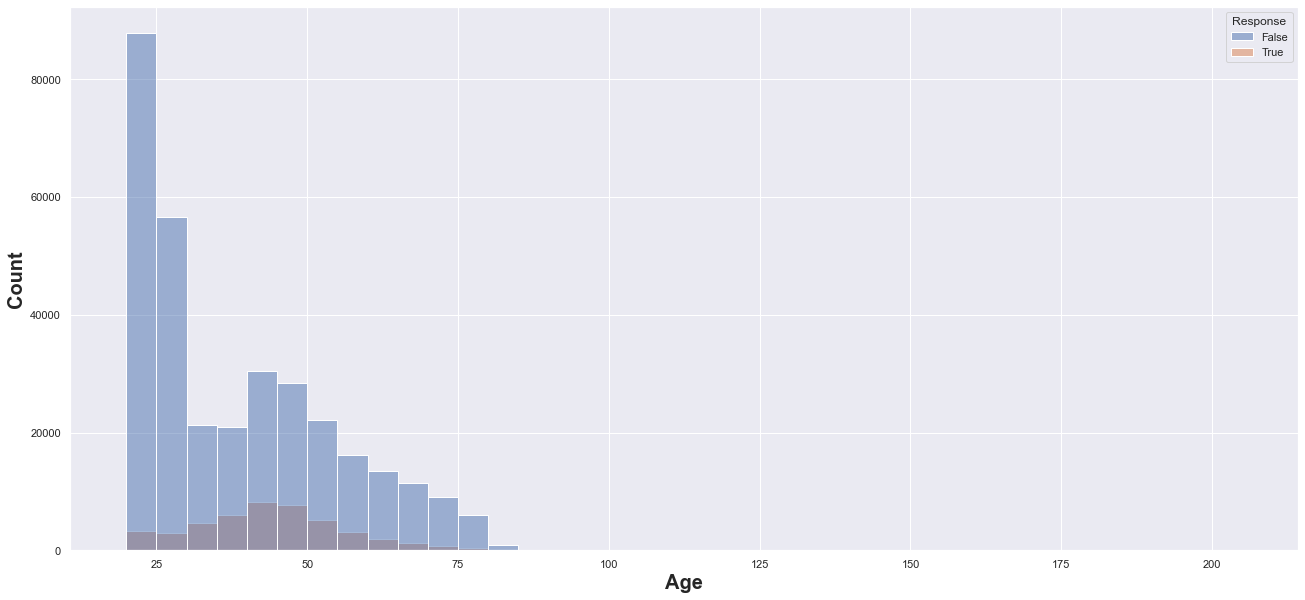

In [56]:
sns.set(rc={"figure.figsize": (22, 10)})
histplot = sns.histplot(data=train_dataset, x="Age", binwidth=5, hue="Response")
histplot.set_xlabel("Age", fontsize=20, weight='bold')
histplot.set_ylabel("Count", fontsize=20, weight='bold');

**Beobachtung**:
- Kunden im mittleren Alter (zwischen 30 Jahre und 60 Jahre) haben ein vergleichsweise höheres Interesse an einer Versicherung.
- Ältere und jüngere Kunden haben ein überproportional geringes Interesse.

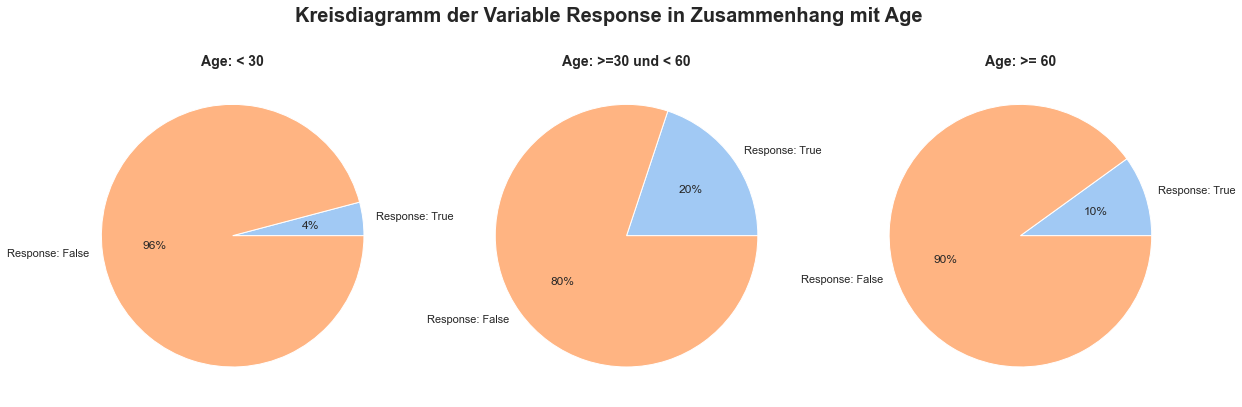

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
colors = sns.color_palette('pastel')[0:2]
fig.suptitle("Kreisdiagramm der Variable Response in Zusammenhang mit Age", fontsize=20, weight="bold")
plt.subplots_adjust(top=1.2)

d_1 = train_dataset.loc[train_dataset["Age"] < 30]
d_2 = train_dataset.loc[(train_dataset["Age"] >= 30) & (train_dataset["Age"] < 60)]
d_3 = train_dataset.loc[(train_dataset["Age"] >= 60) & (train_dataset["Age"] < 100)] # remove false data

l = ["Response: True", "Response: False"]

p_1 = [len(d_1.loc[d_1["Response"] == True]),
       len(d_1.loc[d_1["Response"] == False])]
ax1.pie(p_1, labels=l, colors=colors, autopct='%.0f%%')
ax1.set_title("Age: < 30", weight="bold", fontsize=14)

p_2 = [len(d_2.loc[d_2["Response"] == True]),
       len(d_2.loc[d_2["Response"] == False])]
ax2.pie(p_2, labels=l, colors=colors, autopct='%.0f%%')
ax2.set_title("Age: >=30 und < 60", weight="bold", fontsize=14)

p_3 = [len(d_3.loc[d_3["Response"] == True]),
       len(d_3.loc[d_3["Response"] == False])]
ax3.pie(p_3, labels=l, colors=colors, autopct='%.0f%%')
ax3.set_title("Age: >= 60", weight="bold", fontsize=14);


**Beobachtung**:
- Besonders in der Altersgruppe 30 Jahre bis 60 Jahre ist ein besonders großes Interesse an einer KFZ-Versicherung zu erkennen

# 3. Data Preparation <a class="anchor" id="chapter3"></a>

Die Erkenntnisse, die im Kapitel **Data Understanding** gewonnen wurden, werden nachfolgend angewandt, um invalide Daten zu entfernen und die Datenqualität zu erhöhen.

## 3.1 Ausreißer behandeln <a class="anchor" id="section_3_1"></a>

### 3.1.1 Ausreißer innerhalb der Variable Age <a class="anchor" id="section_3_1_1"></a>

- Ab dem Alter >100 Jahre werden alle Werte in Missing Values umgewandelt, da dieses Alter nicht realitätsnah ist.
- Diese Grenze wurde als großzügige Einschätzung des zu erwartenden Lebensalters festgelegt.

In [58]:
print(f"Es sind {len(train_dataset.loc[train_dataset['Age']> 100])} Datensätze von dieser Änderung betroffen.")

Es sind 100 Datensätze von dieser Änderung betroffen.


In [59]:
train_dataset.loc[train_dataset["Age"] > 100, "Age"] = np.NaN

### 3.1.2 Ausreißer innerhalb der Variable Annual_Premium <a class="anchor" id="section_3_1_2"></a>

In [60]:
train_dataset["Annual_Premium"].describe()

count    380999.000000
mean      30527.700690
std       17242.997675
min       -9997.000000
25%       24371.000000
50%       31656.000000
75%       39390.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

Negative Werte für `Annual_Premium` sind nicht valide. Es würde bedeuten, dass die Versicherungsgesellschaft den Kunden bezahlt.

In [61]:
print(f"Es sind {len(train_dataset.loc[train_dataset['Annual_Premium']< 0])} Datensätze von dieser Änderung betroffen.")

Es sind 367 Datensätze von dieser Änderung betroffen.


In [62]:
# remove negative values
train_dataset.loc[train_dataset["Annual_Premium"] < 0, "Annual_Premium"] = np.NaN

## 3.2 Analyse der nicht vorhandenen Werte <a class="anchor" id="section_3_2"></a>

### 3.2.1 Löschen der 51 fehlerhaften Datensätze <a class="anchor" id="section_3_2_1"></a>

Wie im Abschnitt 2.6.2 beschrieben wurden 51 Datensätze in den Spalten `Driving_License`, `Previously_Insured`, `Vehicle_Age`, `Vehicle_Damage` und `Vintage` mit Missing Values gefunden, die zum selben Datensatz gehören. Da diese keinen signifikanten Einfluss auf das Modell haben werden, werden sie entfernt.

In [63]:
# remove 51 data sets with missing values
# NaN_in_selected_columns was generated before and contains 51 data sets that we want to remove
train_dataset = train_dataset.loc[~train_dataset["id"].isin(NaN_in_selected_columns["id"].to_numpy())]  # ~ = not

In [64]:
train_dataset.isna().sum()

id                          0
Gender                   1000
Age                     10941
Driving_License             0
Region_Code                 0
Previously_Insured          0
Vehicle_Age                 0
Vehicle_Damage              0
Annual_Premium            367
Policy_Sales_Channel        0
Vintage                     0
Response                    0
dtype: int64

## 3.3 Train/Test-Split <a class="anchor" id="section_3_3"></a>

Für den Split unterteilen wir die Daten aus der "train.csv" in Trainingsdaten und Testdaten. Hier wird ein 70/30-Split genutzt.
- Es wird eine Teilung in 70% Trainingsdaten und 30% Testdaten vorgenommen.
- Der Algorithmus lernt aus den Trainingsdaten und dient zum Trainieren des Modells.
- Die Testdaten sind unabhängig von den Trainingsdaten und werden beim Training des Modells nicht benutzt.

In [65]:
#Features
X = train_dataset.copy(deep=True)
X.drop("Response", axis="columns", inplace=True)
X.drop("id", axis="columns", inplace=True)
#labels
y = train_dataset['Response'].copy(deep=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# help IDE understand that we are still dealing with data frames
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

## 3.4 Imputation der fehlenden Werte <a class="anchor" id="section_3_4"></a>

*Imputationsstrategie*:<br>
Die Imputation erfolgt anhand der nachfolgenden Prozedur. Es werden verschiedene Imputationsstrategien (`mean`, `median`, `hot_code_locf` und `most_frequent`) ausprobiert.
- Die Imputation der fehlenden Werte wird für die Trainingsdaten "X_train" und für die Testdaten "X_test" gemacht.

In [66]:
# strategies: mean, median, hot_code_locf, most_frequent, KNN
def impute_data(data: pd.DataFrame, col_name, strategy, y_data=None):
    if(strategy == "hot_code_locf"):
        return data[col_name].fillna(method="ffill")

    elif(strategy == "KNN"):
        # prepare data
        ref_data = pd.concat([data, pd.get_dummies(
            data["Gender"], prefix="Gender_is_")], axis=1)
        ref_data = pd.concat([data, pd.get_dummies(
            data["Vehicle_Age"], prefix="Vehicle_Age_is_")], axis=1)
        ref_data = data.loc[:, ~data.columns.duplicated()]

        # KNN imputation
        imputer = KNNImputer(missing_values=np.nan, n_neighbors=2)
        col_data = imputer.fit_transform(
            ref_data.select_dtypes(["number", "boolean"]), y_data)

        # restore column names
        col_data = pd.DataFrame(col_data, columns=ref_data.columns)

        return col_data[col_name]

    else:
        imputer = SimpleImputer(strategy=strategy, missing_values=np.NaN)
        fit = imputer.fit(data[[col_name]])
        col_data = fit.transform(data[[col_name]])
        return col_data


### 3.4.1 Ersetzung der fehlenden Werte numerischer Variablen <a class="anchor" id="section_3_4_1"></a>

#### 3.4.1.1 Imputation der Variable Age <a class="anchor" id="section_3_4_1_1"></a>

In [67]:
#Trainingsdaten
X_train["Age"] = impute_data(X_train, "Age", "mean")

#Testdaten
X_test["Age"] = impute_data(X_test, "Age", "mean")

#### 3.4.1.2 Imputation der Variable Annual_Premium <a class="anchor" id="section_3_4_1_2"></a>

In [68]:
#Trainingsdaten
X_train["Annual_Premium"] = impute_data(X_train, "Annual_Premium", "median")

#Testdaten
X_test["Annual_Premium"] = impute_data(X_test, "Annual_Premium", "median")

### 3.4.2 Ersetzung der fehlenden Werte kategorialer Variablen <a class="anchor" id="section_3_4_2"></a>

#### 3.4.2.1 Imputation der Variable Gender <a class="anchor" id="section_3_4_2_1"></a>

In [69]:
#Trainingsdaten
X_train["Gender"] = impute_data(X_train, "Gender", "most_frequent")

#Testdaten
X_test["Gender"] = impute_data(X_test, "Gender", "most_frequent")

#cast Gender to category Datatype again:
#Trainingsdaten
X_train["Gender"] = X_train["Gender"].astype(pd.CategoricalDtype())

#Testdaten
X_test["Gender"] = X_test["Gender"].astype(pd.CategoricalDtype())

### 3.4.3 Überprüfung der Imputationen<a class="anchor" id="section_3_4_3"></a>

In [70]:
print(f'Missing Values in der Spalte Age: Test = {X_test["Age"].isna().sum()}, Training = {X_train["Age"].isna().sum()}')
print(f'Missing Values in der Spalte Annual_Premium: Test = {X_test["Annual_Premium"].isna().sum()}, Training = {X_train["Annual_Premium"].isna().sum()}')
print(f'Missing Values in der Spalte Gender: Test = {X_test["Gender"].isna().sum()}, Training = {X_train["Gender"].isna().sum()}')

Missing Values in der Spalte Age: Test = 0, Training = 0
Missing Values in der Spalte Annual_Premium: Test = 0, Training = 0
Missing Values in der Spalte Gender: Test = 0, Training = 0


Die Imputation war erfolgreich und alle Missing Values in den Trainingsdaten und Testdaten wurden ersetzt.

## 3.5. Sampling <a class="anchor" id="section_3_5"></a>

Zunächst muss die Zielvariable wieder zum Test- und Trainingsdatensatz hinzugefügt werden, da wir beim Sampling die Zielvariable `Response` betrachten.

- Insgesamter Datensatz der Zielvariable im **X_train** beträgt: 266.663 Datensätze
- Davon macht True 12% des Datensatzes aus. Dies ist die minority Class
- Davon macht False 88% des Datensatzes aus. Dies ist die majority Class<br>
<br>
- Insgesamter Datensatz der Zielvariable im **X_test** beträgt: 114.285 Datensätze
- Davon macht True 12% des Datensatzes aus. Dies ist die minority Class
- Davon macht False 88% des Datessatzes aus. Dies ist die majority Class

Mit der Methode des zufälligen Oversamplings werden Datensätze aus der Minderheitsklasse, in dem Fall `Response` True, zufällig ausgewählt und dupliziert und dem Trainingsdatensatz hinzugefügt.
Beim zufälligen Undersampling werden Datensätze aus der Mehrheitsklasse, in dem Fall `Response` False, zufällig ausgewählt und aus dem Trainingsdatensatz entfernt.
- Aus einer unbalancierten Klassenverteilung wird zwischen der minority und majority class ein Gleichgewicht hergestellt.


In [71]:
# re-add Response

#insert in X_train --> y_train 
X_train.insert(len(X_train.columns), value=y_train, column="Response")

#insert in X_test --> y_test
X_test.insert(len(X_test.columns), value=y_test, column="Response")

In [72]:
# functions for visualization

# plot output
def plot_prop_of_split(train, test, col_name):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    #Plot for Trainingdata
    cp_1 = sns.countplot(data=train, x=col_name, ax=ax[0])
    cp_1.set_title("Trainingsdaten", weight="bold", fontsize=14)
    cp_1.set_xlabel("Response", fontsize=20, weight='bold')
    cp_1.set_ylabel("Count", fontsize=20, weight='bold');

    #Plot for Testdata
    cp_2 = sns.countplot(data=test, x=col_name, ax=ax[1])
    cp_2.set_title("Testdaten", weight="bold", fontsize=14)
    cp_2.set_xlabel("Response", fontsize=20, weight='bold')
    cp_2.set_ylabel("Count", fontsize=20, weight='bold');

   #Title over both charts
    fig.suptitle(f"Verteilung der Variable {col_name} in Trainingsdaten und Testdaten", weight="bold", fontsize=30)
    fig.show()


# console output
def print_class_len_and_ratio(data: pd.DataFrame, col_name):

    # minority_class
    minority_class_len = len(data[data[col_name] == True])
    print(f"Die Variable {col_name} enthält {minority_class_len} Datensätze die den Wert True enthalten.")

    # majority_class
    majority_class_len = len(data[data[col_name] == False])
    print(f"Die Variable {col_name} enthält {majority_class_len} Datensätze die den Wert False enthalten.")

    # ratio
    print(train_dataset["Response"].value_counts(normalize=True))

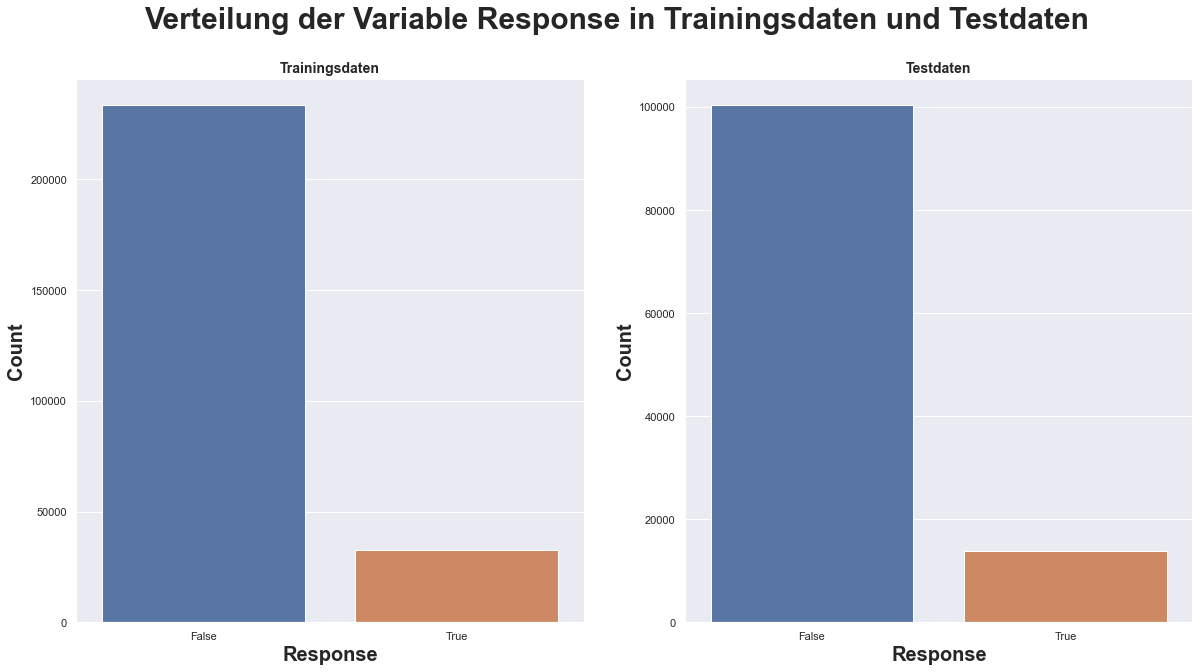

In [73]:
plot_prop_of_split(X_train, X_test, "Response")

In [74]:
print_class_len_and_ratio(X_train, "Response")
print("-"*50)
print_class_len_and_ratio(X_test, "Response")

Die Variable Response enthält 32874 Datensätze die den Wert True enthalten.
Die Variable Response enthält 233789 Datensätze die den Wert False enthalten.
False    0.877424
True     0.122576
Name: Response, dtype: float64
--------------------------------------------------
Die Variable Response enthält 13821 Datensätze die den Wert True enthalten.
Die Variable Response enthält 100464 Datensätze die den Wert False enthalten.
False    0.877424
True     0.122576
Name: Response, dtype: float64


### 3.5.1. Undersampling <a class="anchor" id="section_3_5_1"></a>

In [75]:
def undersample(data: pd.DataFrame, col_name):
    # Variable values count as integer
    response_false_count, response_true_count = data[col_name].value_counts()

    # Seperate in bool values (True and False values)
    seperate_response_false = data[data[col_name] == False]
    seperate_response_true = data[data[col_name] == True]

    # Undersampling to balance imbalanced datasets --> deleting samples from the majority class
    response_false_undersampling = seperate_response_false.sample(response_true_count)
    undersampling = pd.concat([response_false_undersampling, seperate_response_true], axis=0)

    return undersampling

Datensätze aus der majority_class werden zufällig entfernt.
- Daraus entsteht eine identische Anzahl an Datensätzen für die Zielvariable `Response` mit den Ausprägungen True und False.
- Der Datensatz wird balanciert, indem die gleiche Anzahl an Datensätzen von True zufällig für False gezogen wird.

Die Variable Response enthält 32874 Datensätze die den Wert True enthalten.
Die Variable Response enthält 32874 Datensätze die den Wert False enthalten.
False    0.877424
True     0.122576
Name: Response, dtype: float64


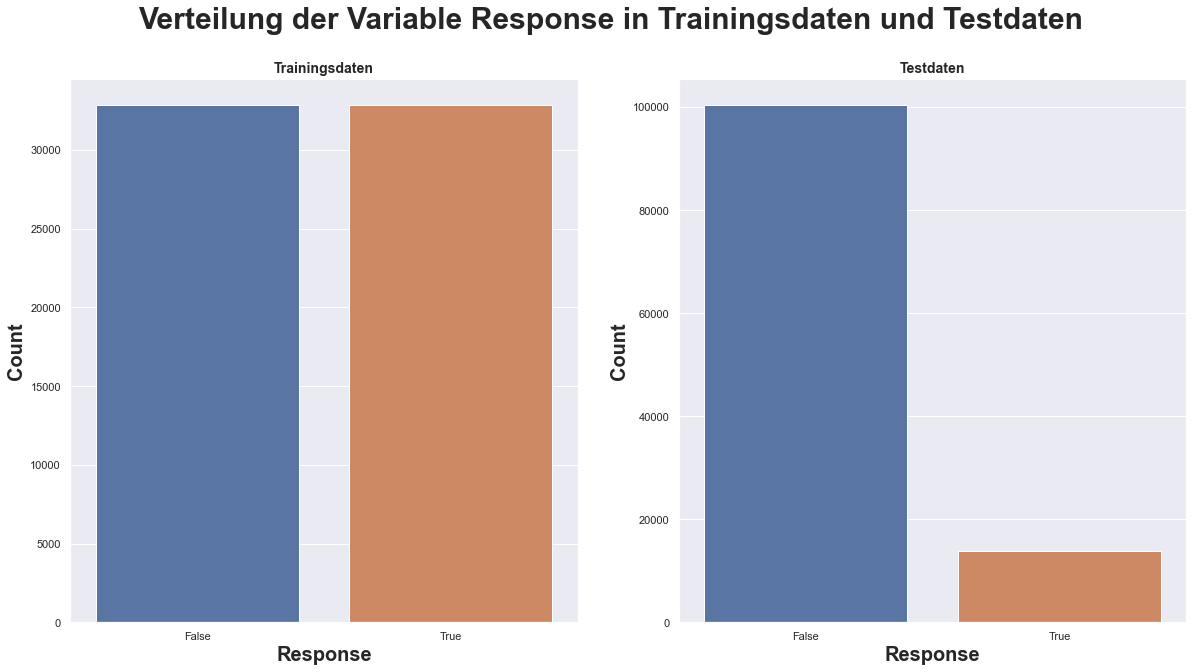

In [76]:
# X_train run through the undersample function from section 3.5.1
X_train_undersampling = undersample(X_train, "Response")

# After the undersampling process X_train_undersampling will be plotted (plot function from section 3.5)
plot_prop_of_split(X_train_undersampling, X_test, "Response")

# console output from X_train_Undersampling
print_class_len_and_ratio(X_train_undersampling, "Response")



### 3.5.2. Oversampling <a class="anchor" id="section_3_5_2"></a>

In [77]:
def oversample(data: pd.DataFrame, col_name):
    # Variable values count as integer
    response_false_count, response_true_count = data[col_name].value_counts()

    # Seperate in bool values (True and False values)
    seperate_response_false = data[data[col_name] == False]
    seperate_response_true = data[data[col_name] == True]

    # Oversampling to balance imbalanced datasets --> generate samples from the minority class
    response_true_oversampling = seperate_response_true.sample(response_false_count, replace=True)
    oversampling = pd.concat([response_true_oversampling, seperate_response_false], axis=0)

    return oversampling  

Datensätze aus der minority_class werden durch Generierung künstlicher Beispiele aufgestockt.
- Daraus entsteht eine identische Anzahl an Datensätzen für die Zielvariable `Response` mit den Ausprägungen True und False.
- Der Datensatz wird balanciert, indem die gleiche Anzahl an Datensätzen von False künstlich für True erzeugt wird.

Die Variable Response enthält 233789 Datensätze die den Wert True enthalten.
Die Variable Response enthält 233789 Datensätze die den Wert False enthalten.
False    0.877424
True     0.122576
Name: Response, dtype: float64


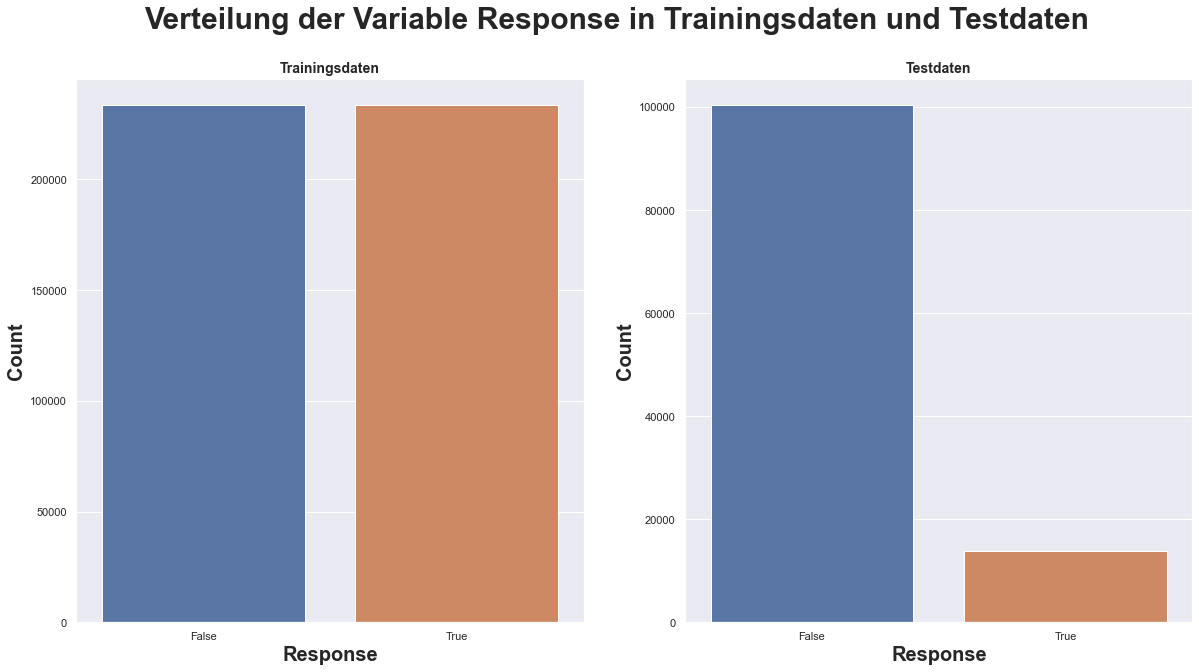

In [78]:
# X_train run through the oversample function from section 3.5.2
X_train_oversampling = oversample(X_train, "Response")

# After the overrsampling process X_train_oversampling will be plotted (plot function from section 3.5)
plot_prop_of_split(X_train_oversampling, X_test, "Response")

# console output from X_train_oversampling
print_class_len_and_ratio(X_train_oversampling, "Response")

### 3.5.3. Cleanup <a class="anchor" id="section_3_5_3"></a>

Die gesplitteten Trainingsdaten und Testdaten mussten für das Over- und Undersampling wieder mit der Zielvariable `Response` verknüpft werden. Im Fall von Oversampling wurden neue Datensätze erzeugt und im Fall von Undersampling wurden Datensätze entfernt, um ein Gleichgewicht der Klassen zu schaffen. Beides führt dazu, dass der gesampelte Datensatz `X_train` (Undersampling oder Oversampling) nicht mehr zu dem ursprünglichen Datensatz der Zielvariable `y_train` passt, da Länge und Zuordnung der Werte des jeweiligen gesampelten Datensatzes nicht mehr übereinstimmt.

In [80]:
# nach dem Undersampling wird die Zielvariable Response der Variable "y_train_undersampling" zugewiesen
y_train_undersampling = X_train_undersampling["Response"]

# nach dem Oversampling wird die Zielvariable Response der Variable "y_train_oversampling" zugewiesen
y_train_oversampling = X_train_oversampling["Response"]

Anschließend wird die Zielvariable wieder von den Trainingsdaten und Testdaten entfernt.

In [81]:
# Remove Response from the undersampled dataset
X_train_undersampling = X_train_undersampling.drop("Response", axis="columns")

# Remove Response from the oversampled dataset
X_train_oversampling = X_train_oversampling.drop("Response", axis="columns")

### 3.5.4. Under- vs. Oversampling <a class="anchor" id="section_3_5_4"></a>

- Bei einem stark unausgeglichenen Datensatz kann das Oversampling dazu führen das die Minterheitsklasse überangepasst wird, da die Wahrscheinlichkeit größer ist das exakte Kopien der Datensätze für die Minderheitsklasse erstellt werden. 

In [ ]:
# set to undersampling to work with this dataset. 
# X_train = the undersampled dataset without response
# y_train = the undersampled dataset only with response

X_train = X_train_undersampling
y_train = y_train_undersampling